### END to END Machine Learning Project :
# *Estimating the price of used car at TrueValue*
  ![image](https://images.financialexpress.com/2021/02/True-Value-13-08-large.jpg?w=692)

## Covid Impacts on transportation :
* Covid have badly impacted the worlds commute , there is no way to deny that. people have mostly preferred to travel in their own vehicels rather to take publictransport. In this Remarkable turn of events peopel from even middle class and lower middle class also started buying the cars .
But, increasing the raw materials and production values have sky rocketed the price of cars , so  all the these people now moved 
to buying an alredy used car , to maintain the commute and safty of their own families which brought boom in the 
sales of used cars which was alredy present in INDIAN MARKET. 

**TRUEVALUE** is one of the popular choices for the all these car buyers. so they want to estimate on what base the value 
of the car can be decided , accpeting the fact that choices are different for all us influenced by the income , familysize , commute distence ..etc..


#### Intial Assumptions :
* Taking the fact, price of the car will decrese from the day it was purchased and time goes on there are lot of factors that influence the price of the used car like .
- how the car was maintained .
- how many services car taken .
- how many kilometers car is driven in past years .
- what is the condition of the car(including the interiors like AC , Soundsystems,Seating,tyers,etc...) 
- how many years have passed by .
- price of the car .
- Did the car had any police records or does it had any damage on the body .
- size of the car .
- Is the car still in production by the manufacture for any spares or replaces to be done .
        
        
    

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib 

# Exploring the data

In [4]:
df=pd.read_csv('Truevalue_traindata.csv')
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021.0,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021.0,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021.0,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021.0,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021.0,True,8397,54225,False,False


In [5]:
df.shape

(6399, 30)

In [6]:
df.keys()

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

In [7]:
df.dtypes

id                       int64
car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on          float64
fitness_certificate     object
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object

<AxesSubplot:>

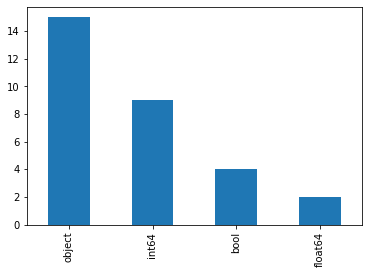

In [8]:
dtypes=df.dtypes.value_counts()
dtypes.plot(kind='bar')

In [9]:
# finding the duplicates
df.duplicated().sum()

0

In [10]:
# looking at the number of manufactures
df["make"].nunique()

26

In [11]:
# Number of unqiue cars
df.car_name.nunique()

182

In [12]:
# finding the unqiue values in each columns
def num_uniques(data):
    for column in data.columns:
        if df[column].dtype == object:
            print("Column name:", column, '\n', "Unique values:",df[column].nunique())
    return      

In [13]:
num_uniques(df)

Column name: car_name 
 Unique values: 182
Column name: fuel_type 
 Unique values: 5
Column name: city 
 Unique values: 13
Column name: body_type 
 Unique values: 5
Column name: transmission 
 Unique values: 2
Column name: variant 
 Unique values: 873
Column name: registered_city 
 Unique values: 230
Column name: registered_state 
 Unique values: 16
Column name: rto 
 Unique values: 255
Column name: source 
 Unique values: 3
Column name: make 
 Unique values: 26
Column name: model 
 Unique values: 182
Column name: car_availability 
 Unique values: 4
Column name: car_rating 
 Unique values: 4
Column name: fitness_certificate 
 Unique values: 2


#  DATA CLEANING and DATA WRANGELING

- we see that number of year a car used in most important aspect in deciding the price, lets create a new column to do so
- handeling missing values with mean and mode
- checking the correlation and dropping the features that are not highly correlated
- making assumption by target variable and dropping the missing values 

# creating a new column for the 'years used'

In [14]:
df["usedyears"]=df['ad_created_on']-df['yr_mfr']

In [15]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,397677,404177.0,great,2021.0,True,8975,57960,False,False,6.0
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,272935,354313.0,great,2021.0,True,6167,39825,False,False,5.0
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,469605,NaN,great,2021.0,True,11096,71655,False,False,4.0
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,294262,374326.0,great,2021.0,True,7154,46200,False,False,8.0
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,360716,367216.0,great,2021.0,True,8397,54225,False,False,6.0


- lets remove out the year of manufacering and advertised date

In [16]:
df1=df.drop(['yr_mfr','ad_created_on'],axis='columns')
df1.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,True,8975,57960,False,False,6.0
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,True,6167,39825,False,False,5.0
2,3,hyundai grand i10,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,True,11096,71655,False,False,4.0
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,True,7154,46200,False,False,8.0
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,True,8397,54225,False,False,6.0


# Handeling the null values 

In [17]:

df1.isnull().sum()

id                        0
car_name                  0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
usedyears                 1
dtype: int64

### lets check the percentage of missing values and hadle them.
- If the contribution of the missing values is more then 25% we drop datapoints or features


In [18]:
df.isnull().sum()/df.shape[0]*100

id                      0.000000
car_name                0.000000
yr_mfr                  0.000000
fuel_type               0.000000
kms_run                 0.000000
sale_price              0.000000
city                    0.000000
times_viewed            0.000000
body_type               1.406470
transmission            7.407407
variant                 0.000000
assured_buy             0.000000
registered_city         0.125020
registered_state        0.125020
is_hot                  0.000000
rto                     0.000000
source                  1.781528
make                    0.000000
model                   0.000000
car_availability        8.470073
total_owners            0.000000
broker_quote            0.000000
original_price         44.131896
car_rating              0.109392
ad_created_on           0.015627
fitness_certificate     0.125020
emi_starts_from         0.000000
booking_down_pymnt      0.000000
reserved                0.000000
warranty_avail          0.000000
usedyears 

- original price have 44% of missing values.
- lets see how the data  is correlated to the sale price and decide the features to drop or not .

Text(0.5, 1.0, 'Correlation Matrix')

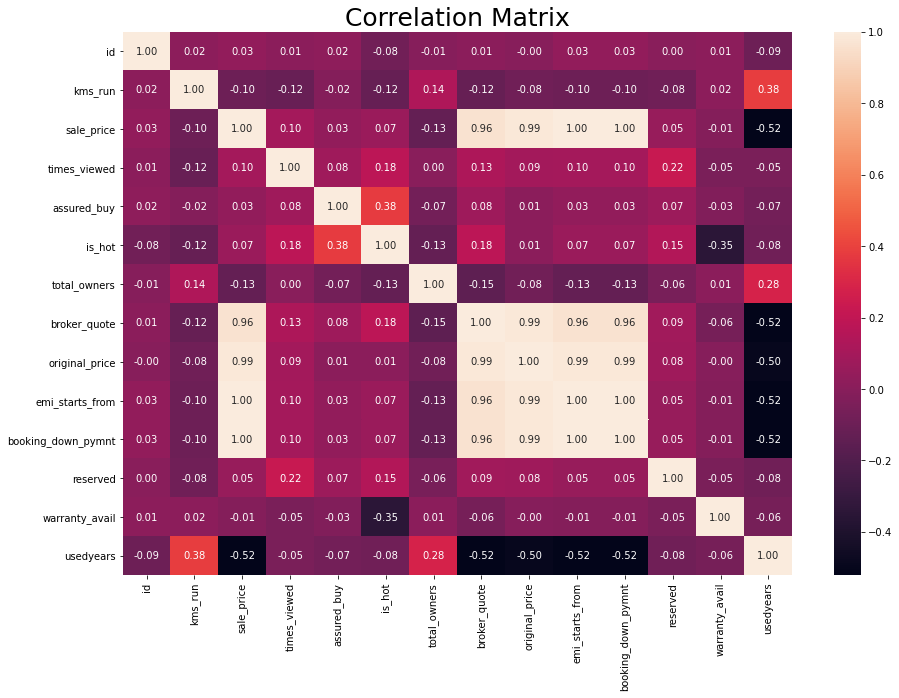

In [19]:
correlation=df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.title("Correlation Matrix",fontsize='25')

##### The target variable sales price highly influenced by the original price ,emi,downpayment,brokers quoteso we can have any of the values , Im removing the original oprice of the cars as there are 44% of missing values and we cant fill them by mean or mode methods  ,And will also remove few more columns like Id , assuredby , is hot 

- creating a new dataset(df_drop) with all the dropped features for the further analysis

In [20]:
df_drop=df1.dropna()
df_drop.shape

(3163, 29)

In [21]:
df2=df1.drop(['id','original_price'],axis='columns')
df2.shape

(6399, 27)

In [22]:
df2.isnull().sum()

car_name                 0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
broker_quote             0
car_rating               7
fitness_certificate      8
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
usedyears                1
dtype: int64

 * we have the list below for missing values  :
    - body_type : 90
    - transmission : 474
    - source: 114( Method of selling a car)
    - car_availability:542 (Car availability status)
    - usedyears:1    
    - car_rating : 7
    - fitness_certificate :8
        
*  I am assuming that if a customer is ready to buy a car the method of sellingwill not effect much as they any wanted to buy a car ,so we will drop the feature
* *Avialbility* , if the car is not avialble it should not be listed so will drop the null values in it 
* *Body type* : The **Mode** of the bodytype is hatchback, but if I check at the car_names ,that had missing bodytypes  there are cars which are SUV and Luxary SUVs so we cant replace them as it will lead to false data i.e  if the name of the car is TATA HARRIER we cant replace it with the hatchback , so we drop them too ..
* Transmission can can replaced with the mode as these days all the cars are coming up with the all kinds if transmission.
* used years,car_ratings,fitness_certificate  can be replaced as well.

In [23]:
df3=df2.drop('source',axis='columns')
df3.head()

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,...,in_stock,2,397677,great,True,8975,57960,False,False,6.0
1,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,...,in_stock,1,272935,great,True,6167,39825,False,False,5.0
2,hyundai grand i10,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,...,in_stock,1,469605,great,True,11096,71655,False,False,4.0
3,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,...,in_stock,1,294262,great,True,7154,46200,False,False,8.0
4,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,...,in_stock,1,360716,great,True,8397,54225,False,False,6.0


In [24]:
df3['transmission']=df3['transmission'].fillna(df3['transmission'].mode()[0])
df3['fitness_certificate']=df3['fitness_certificate'].fillna(df3['fitness_certificate'].mode()[0])
df3['car_rating']=df3['car_rating'].fillna(df3['car_rating'].mode()[0])

In [25]:
df3['usedyears']=df3['usedyears'].fillna(df3['usedyears'].mean())

In [26]:
df3.isnull().sum()

car_name                 0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission             0
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
make                     0
model                    0
car_availability       542
total_owners             0
broker_quote             0
car_rating               0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
usedyears                0
dtype: int64

In [27]:
df4=df3.dropna()
df4.shape

(5791, 26)

In [28]:
df4.isnull().sum()

car_name               0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
car_rating             0
fitness_certificate    0
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
usedyears              0
dtype: int64

#### Finally we dont have missing values, so lets get into 
# EDA 
# Outliers detection and handling

In [29]:
df4.head()

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,...,in_stock,2,397677,great,True,8975,57960,False,False,6.0
1,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,...,in_stock,1,272935,great,True,6167,39825,False,False,5.0
2,hyundai grand i10,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,...,in_stock,1,469605,great,True,11096,71655,False,False,4.0
3,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,...,in_stock,1,294262,great,True,7154,46200,False,False,8.0
4,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,...,in_stock,1,360716,great,True,8397,54225,False,False,6.0


In [30]:
# lets see which manufactures have highes number of cars 
def count_plot(data):
    for column in data.columns:
        if data[column].dtype ==object:
            plt.figure(figsize=(25,10))
            sns.countplot(data[column],data=data,palette='cubehelix')
            plt.show()
    return

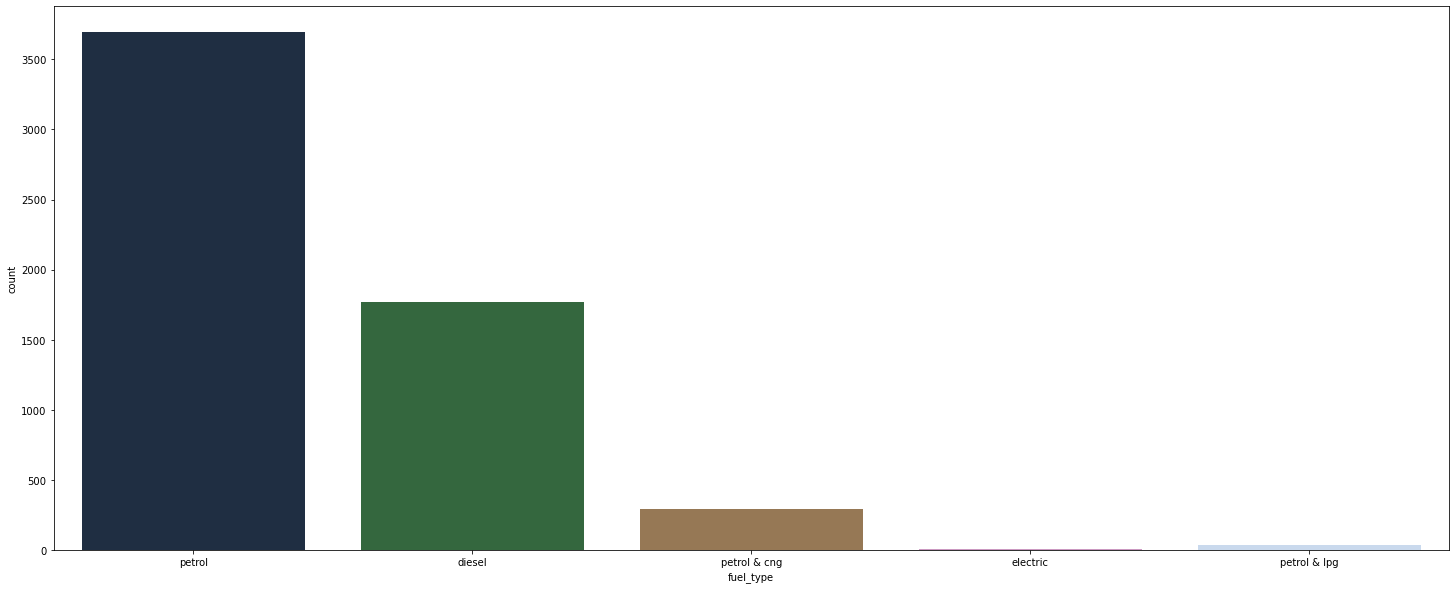

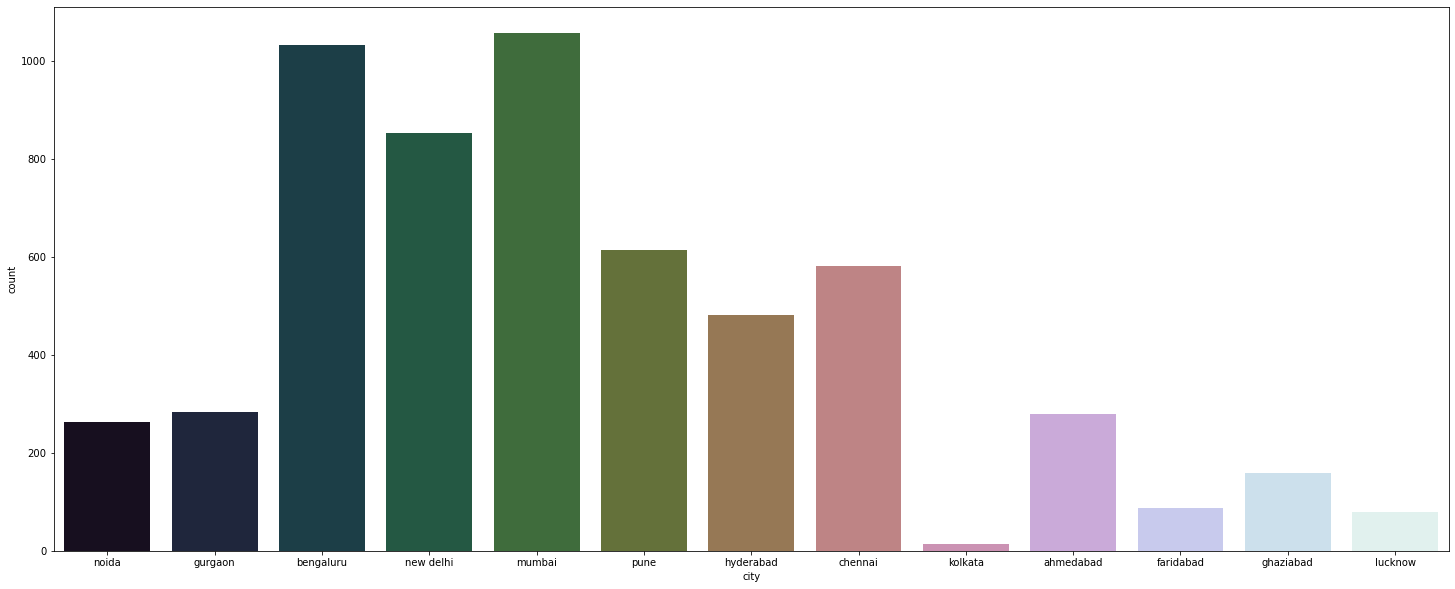

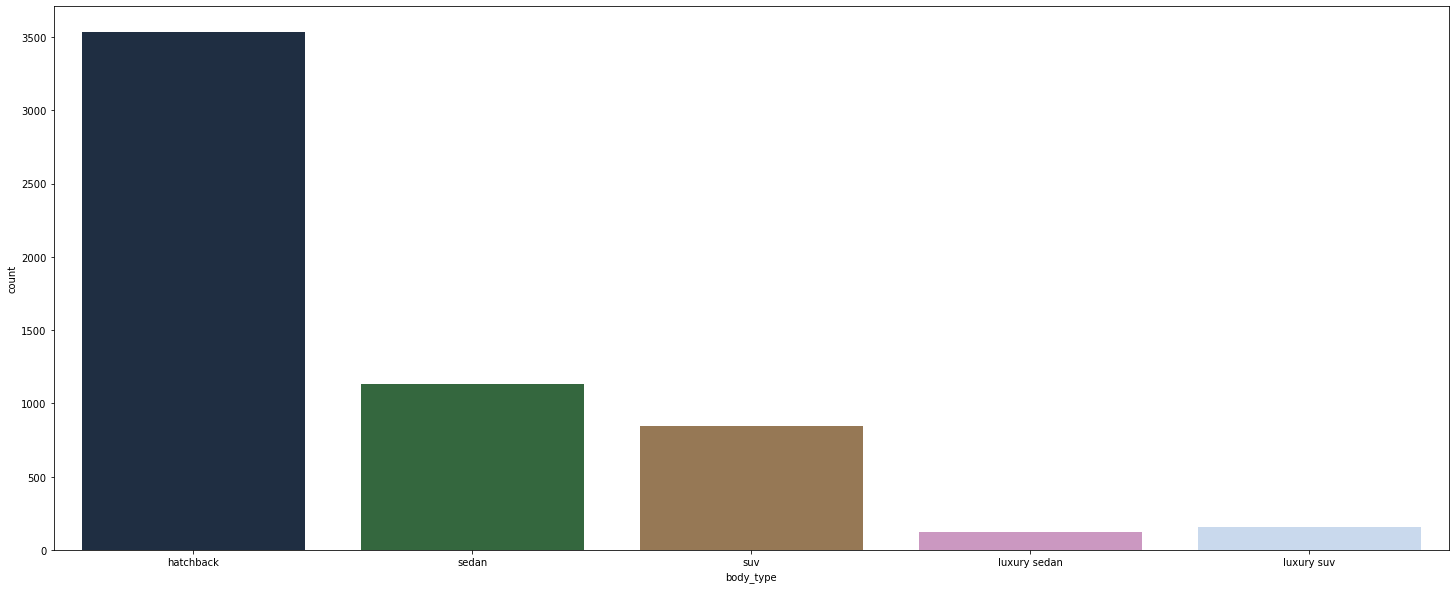

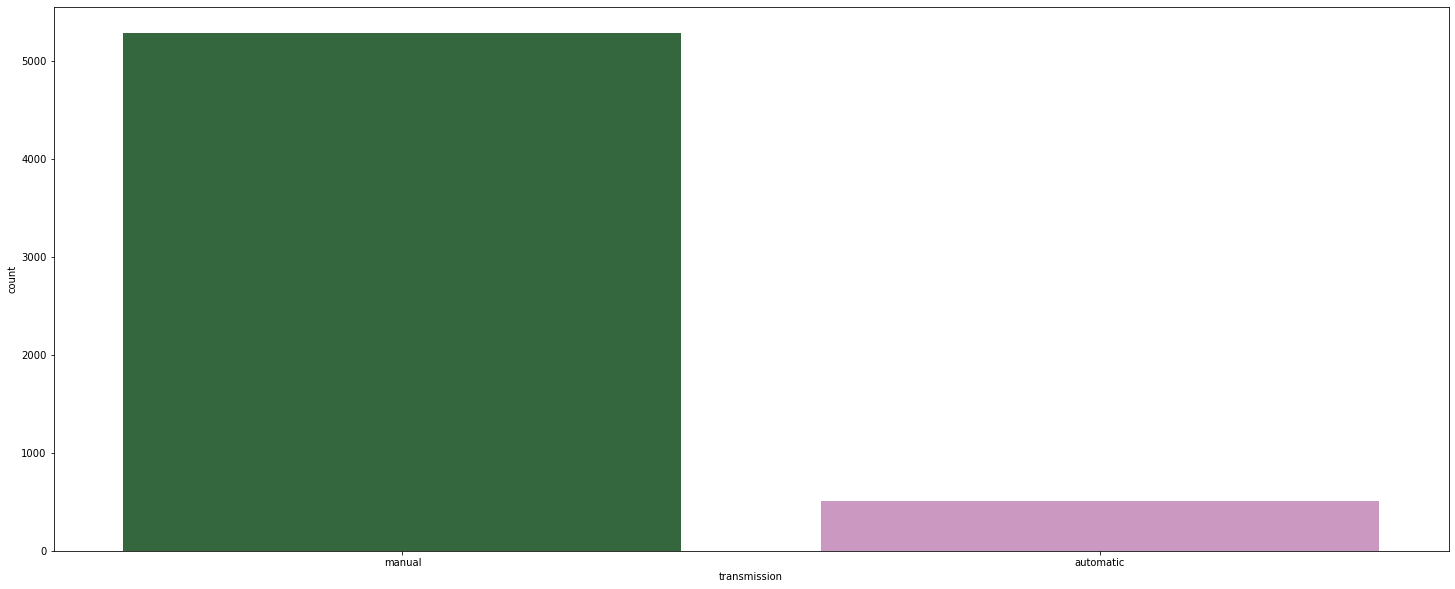

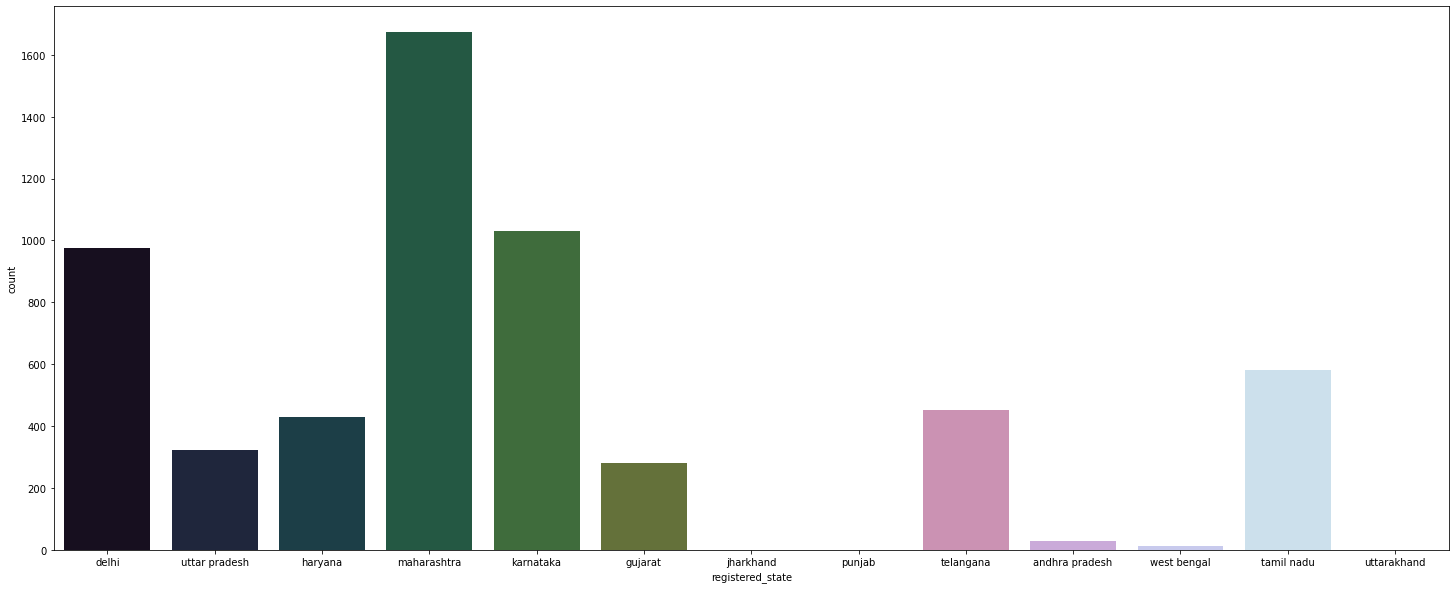

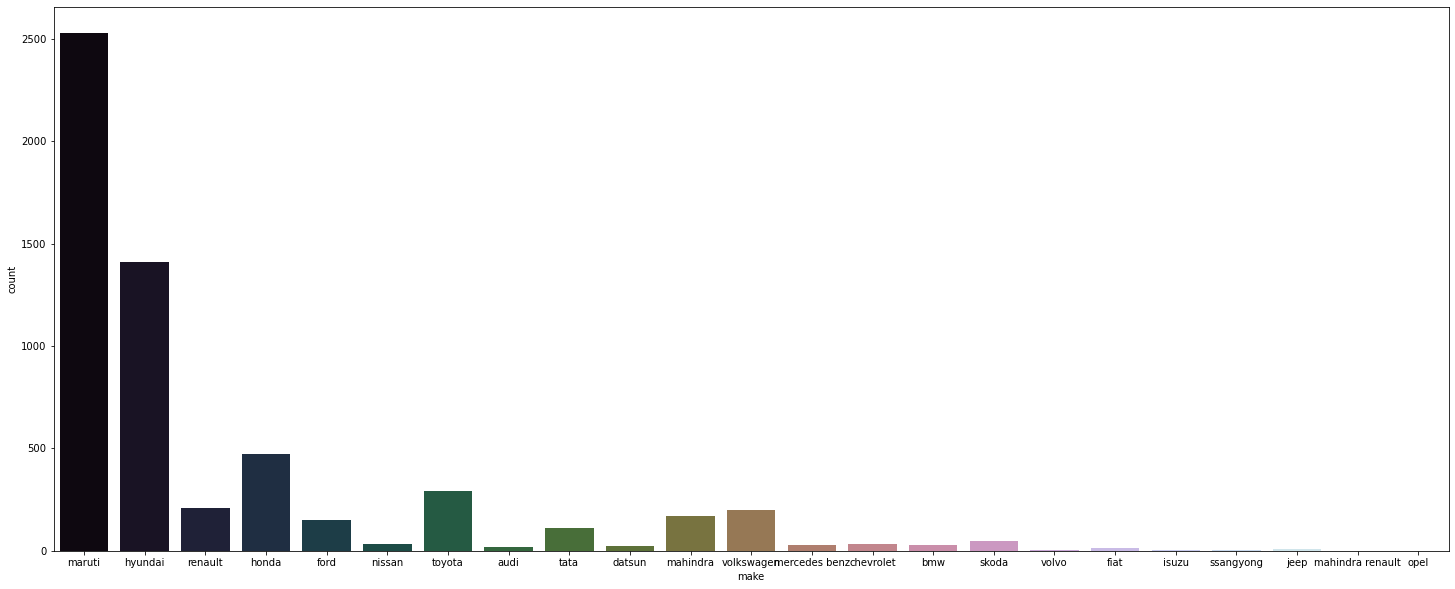

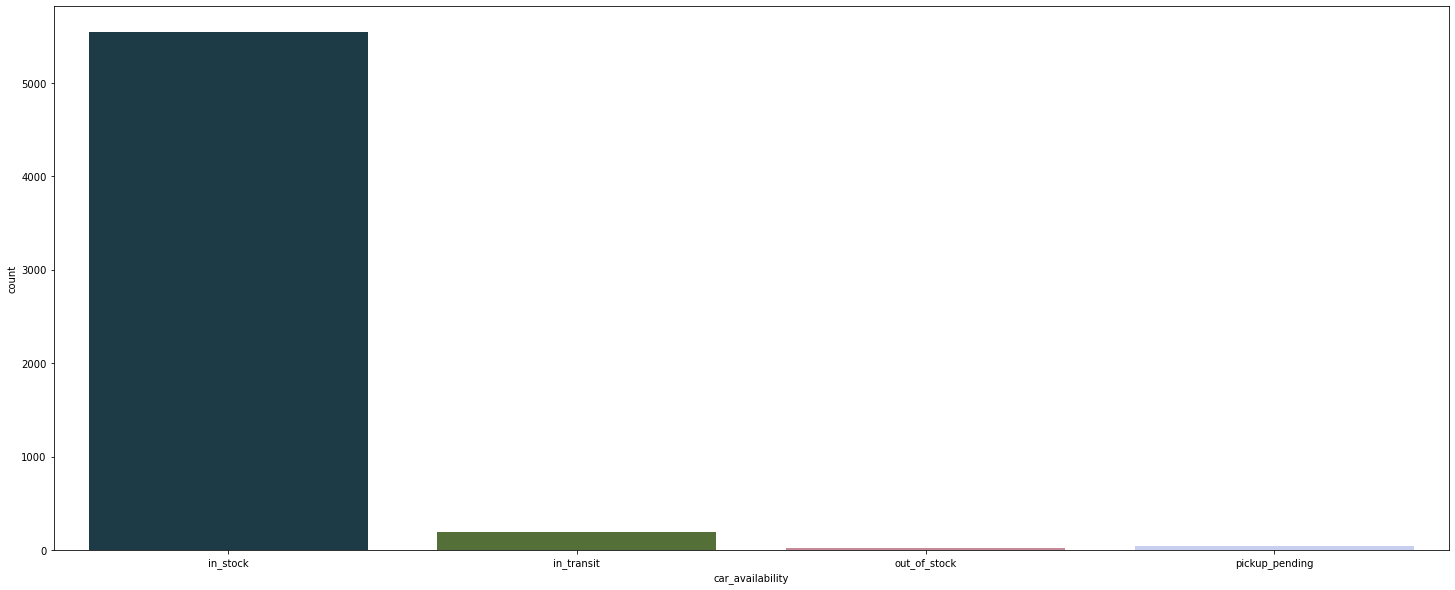

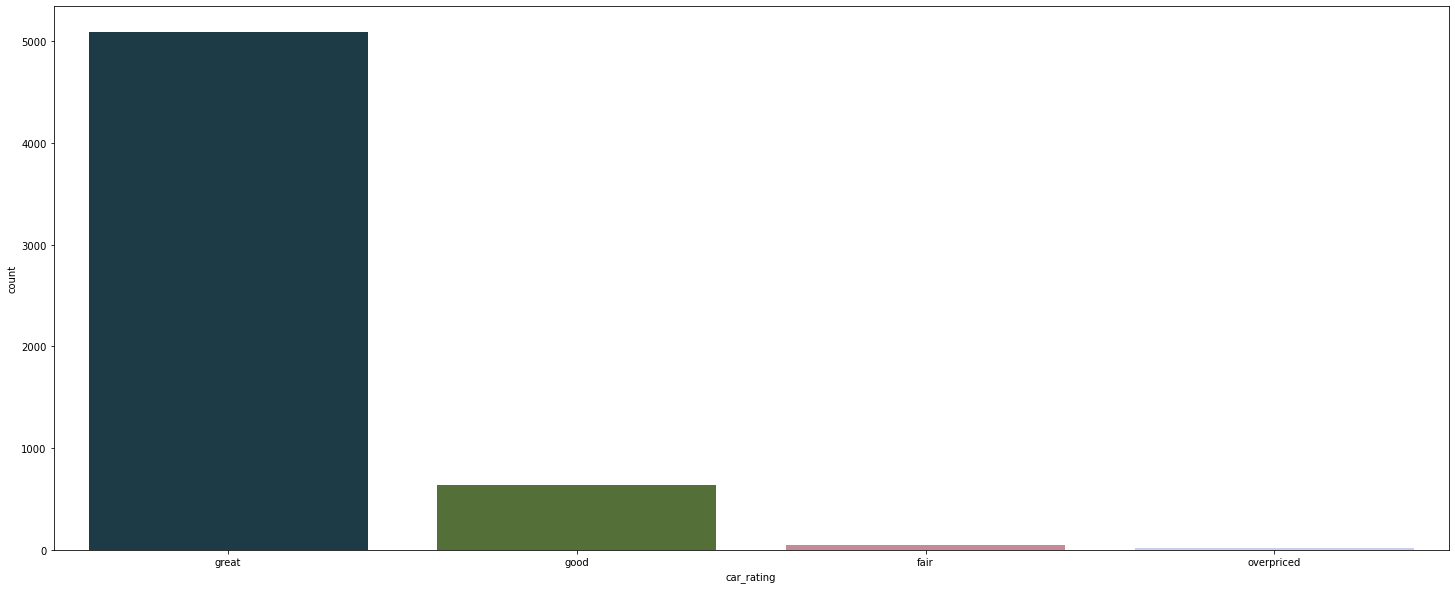

In [31]:
count_plot(df4.drop(['car_name','variant','registered_city','rto','model'],axis='columns'))
# we are dropping these columns as they are making graph so easy complex and time taking as they have lot records 

### creating a new dataframe for the integer values 

In [33]:
int_col=df4.select_dtypes(include=['int64','float64'])

In [34]:
int_col

,kms_run,sale_price,times_viewed,total_owners,broker_quote,emi_starts_from,booking_down_pymnt,usedyears
0,8063,386399,18715,2,397677,8975,57960,6.0
1,23104,265499,2676,1,272935,6167,39825,5.0
2,23402,477699,609,1,469605,11096,71655,4.0
3,39124,307999,6511,1,294262,7154,46200,8.0
4,22116,361499,3225,1,360716,8397,54225,6.0
...,...,...,...,...,...,...,...,...
6386,43035,315899,2559,1,283282,7338,47385,3.0
6387,148250,531399,3680,2,519315,12343,79710,6.0
6388,77518,215000,225,1,124000,4994,32250,10.0
6389,126285,210000,553,1,111000,4878,31500,9.0


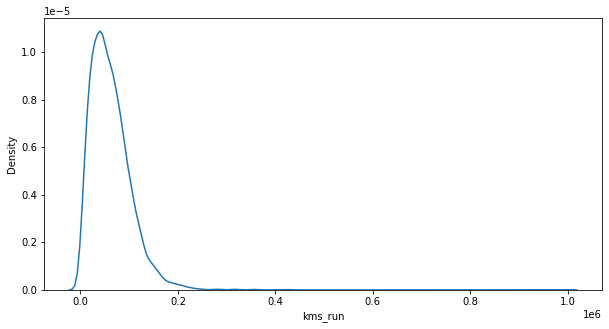

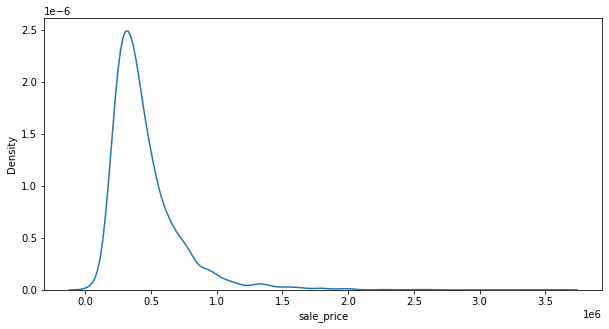

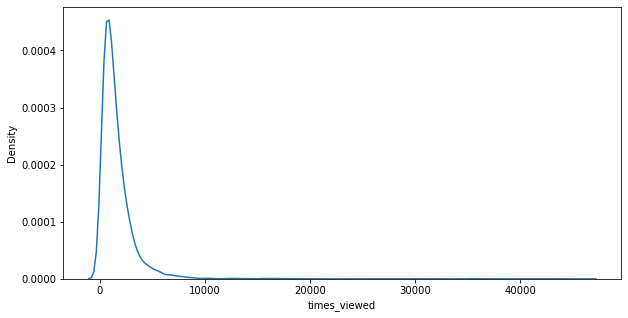

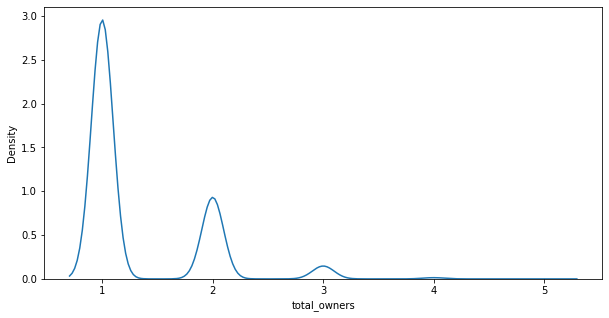

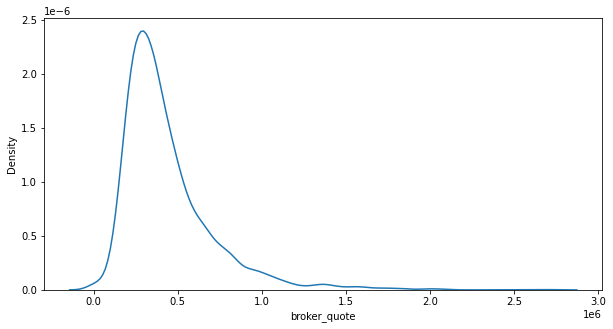

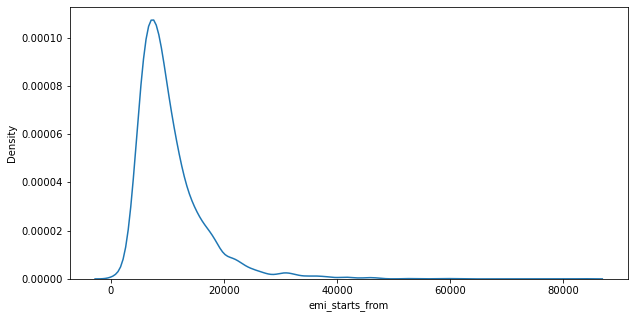

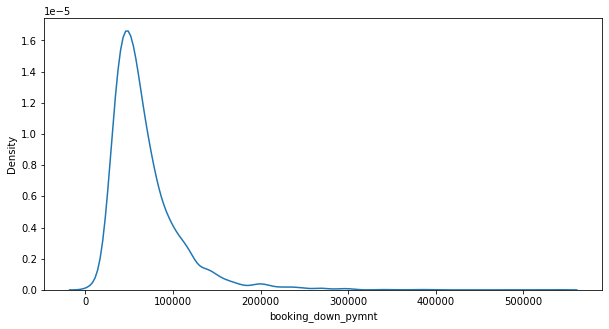

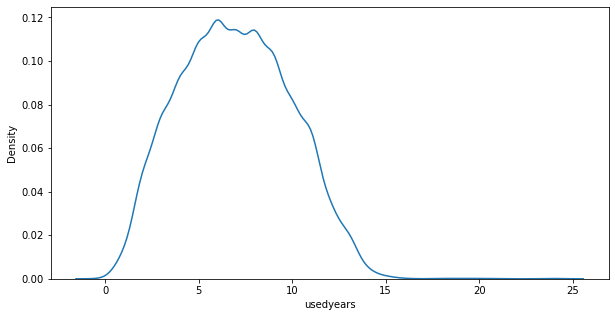

In [35]:
for fet in int_col:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df4[fet])

### we can understnad that most of the features are linearly distributed but also had outliers

In [36]:
mean_sale_price=df4.groupby('city')['sale_price'].mean()
mean_sale_price=pd.DataFrame(mean_sale_price)
mean_sale_price

,sale_price
city,
ahmedabad,464135.567857
bengaluru,470790.745648
chennai,487493.728055
faridabad,428080.784091
ghaziabad,410766.862500
gurgaon,447568.646643
hyderabad,442934.493776
kolkata,330545.384615
lucknow,472281.425000


- Mean sale prce is around 400000 to 500000 in each city 

### lets see how the sale price if effectd by the number_of kilometers 

<Figure size 1080x720 with 0 Axes>

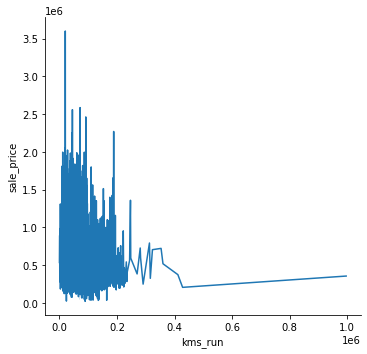

In [37]:
plt.figure(figsize=(15,10))
sns.relplot(x="kms_run", y="sale_price", kind="line", data=df4);

In [38]:
df4.describe()

,kms_run,sale_price,times_viewed,total_owners,broker_quote,emi_starts_from,booking_down_pymnt,usedyears
count,5791.000000,5.791000e+03,5791.000000,5791.000000,5.791000e+03,5791.000000,5791.000000,5791.000000
mean,62134.210672,4.534936e+05,1625.477465,1.313417,4.377096e+05,10533.523744,68024.190468,6.960629
std,42443.478675,2.653988e+05,1984.537768,0.557280,2.720244e+05,6164.548549,39809.848048,2.944772
min,60.000000,2.000000e+04,3.000000,1.000000,0.000000e+00,465.000000,3000.000000,0.000000
25%,32042.000000,2.857490e+05,638.000000,1.000000,2.622185e+05,6637.000000,42862.500000,5.000000
50%,55172.000000,3.827990e+05,1160.000000,1.000000,3.643250e+05,8891.000000,57420.000000,7.000000
75%,83710.000000,5.376990e+05,1998.000000,2.000000,5.285075e+05,12489.000000,80655.000000,9.000000
max,996609.000000,3.600000e+06,46141.000000,5.000000,2.729327e+06,83619.000000,540000.000000,24.000000


# lets look at the outliers

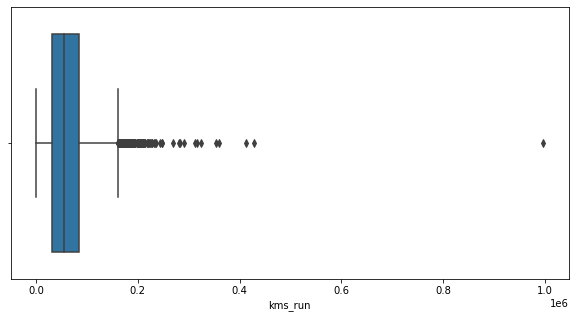

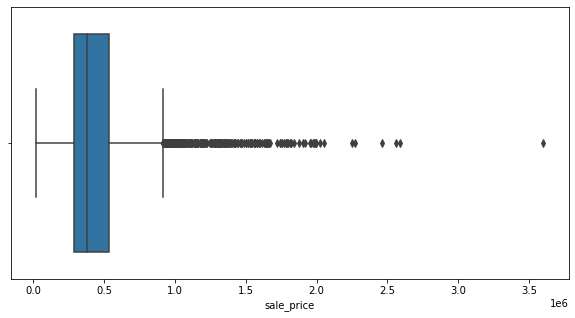

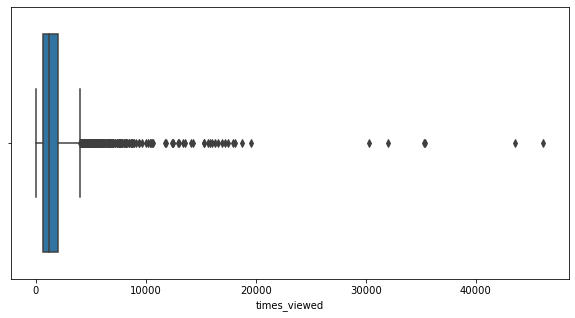

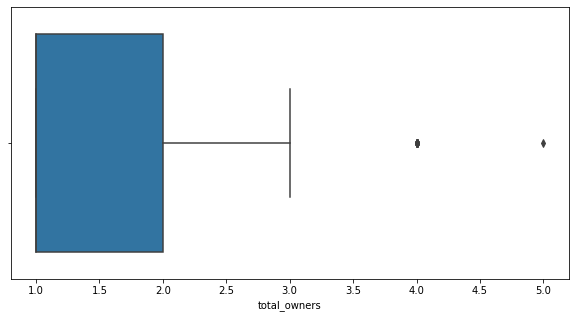

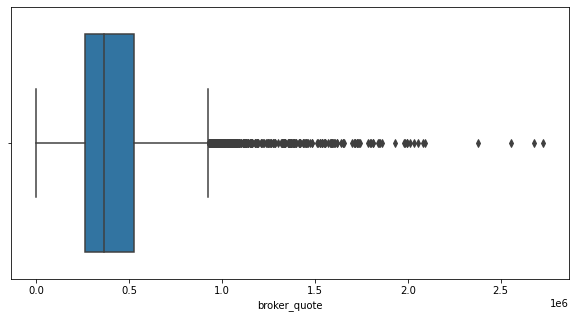

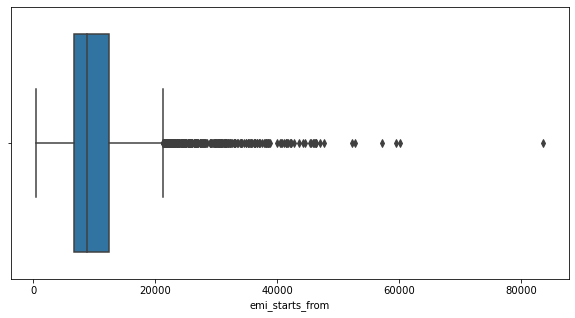

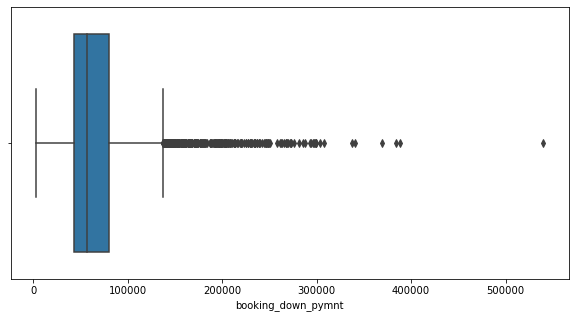

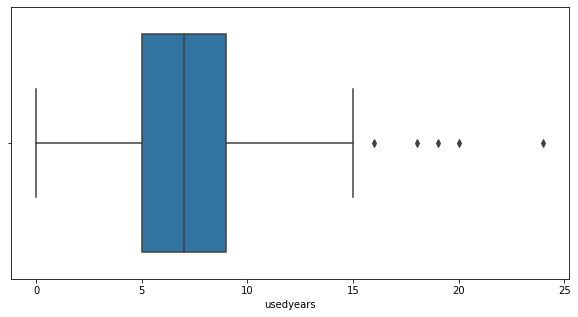

In [39]:
for fet in int_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df4[fet])

In [40]:
df4[df4.kms_run>180000]

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
70,maruti swift dzire,diesel,180639,312099,noida,669,sedan,manual,vdi bs iv,True,...,in_stock,1,302763,great,True,7249,46815,False,False,9.0
76,maruti swift,diesel,194203,284099,noida,1020,hatchback,manual,vdi,True,...,in_stock,1,284626,great,True,6599,42615,False,False,8.0
79,renault scala,diesel,219642,264299,noida,1241,sedan,manual,rxz,True,...,in_stock,1,226320,good,True,6139,39645,False,False,8.0
150,maruti ertiga,diesel,186207,440199,noida,1085,suv,manual,vdi,True,...,in_stock,1,387269,good,True,10225,66030,False,False,9.0
151,volkswagen vento,diesel,192715,377799,noida,888,sedan,manual,highline diesel,True,...,in_stock,1,350604,great,True,8775,56670,False,False,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,maruti swift dzire,diesel,200944,250000,ahmedabad,203,sedan,manual,tour,False,...,in_stock,1,0,fair,True,5807,37500,False,False,6.0
6088,hyundai creta,diesel,207822,662999,faridabad,1846,suv,manual,1.6 sx crdi,True,...,in_stock,1,670619,great,True,15400,99450,True,False,6.0
6363,toyota etios,diesel,232482,542599,lucknow,2104,sedan,manual,gd,True,...,in_stock,1,517244,great,True,12603,81390,False,False,4.0
6369,toyota fortuner,diesel,182082,1268053,lucknow,4787,luxury suv,manual,3.0 mt 4x4,True,...,in_stock,2,1264848,great,True,29454,190208,False,False,7.0


<AxesSubplot:xlabel='kms_run'>

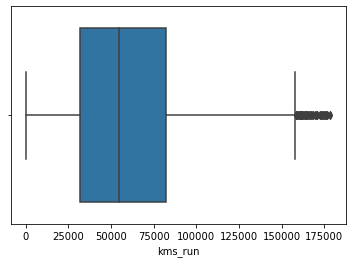

In [41]:
df5=df4[df4.kms_run<180000]
sns.boxplot(df5.kms_run)

In [42]:
df5.shape

(5713, 26)

In [43]:
dff=df5.copy()
dff.head()

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,...,in_stock,2,397677,great,True,8975,57960,False,False,6.0
1,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,...,in_stock,1,272935,great,True,6167,39825,False,False,5.0
2,hyundai grand i10,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,...,in_stock,1,469605,great,True,11096,71655,False,False,4.0
3,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,...,in_stock,1,294262,great,True,7154,46200,False,False,8.0
4,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,...,in_stock,1,360716,great,True,8397,54225,False,False,6.0


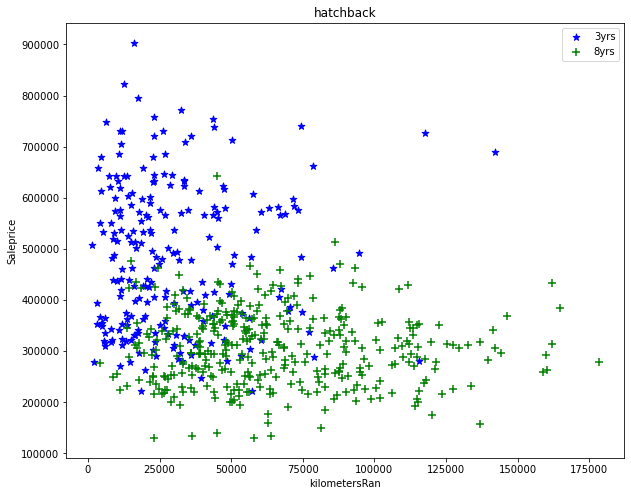

In [46]:
def scatter_plot(data,body_type):
    age_3=data[(data.body_type==body_type) & (data.usedyears==3)]
    age_8=data[(data.body_type==body_type) & (data.usedyears==8)]
    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(age_3.kms_run,age_3.sale_price,color='blue',marker='*',s=50,label='3yrs')
    plt.scatter(age_8.kms_run,age_8.sale_price,color='green',marker='+',s=50,label='8yrs')
    plt.xlabel("kilometersRan",fontsize='10')
    plt.ylabel("Saleprice",fontsize='10')
    plt.title(body_type)
    plt.legend()

scatter_plot(dff,'hatchback')   

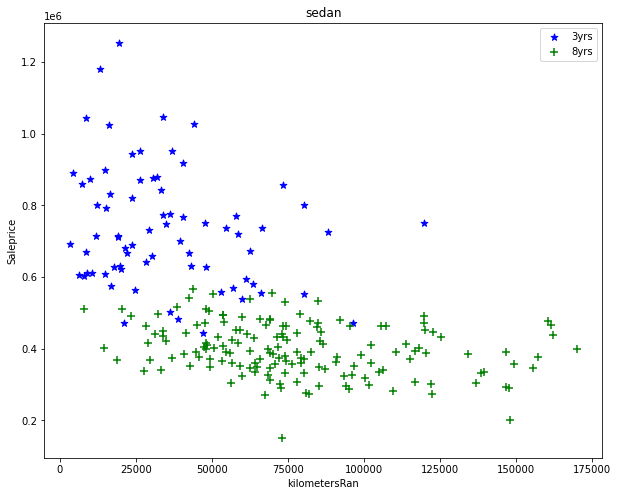

In [47]:
scatter_plot(dff,'sedan')   

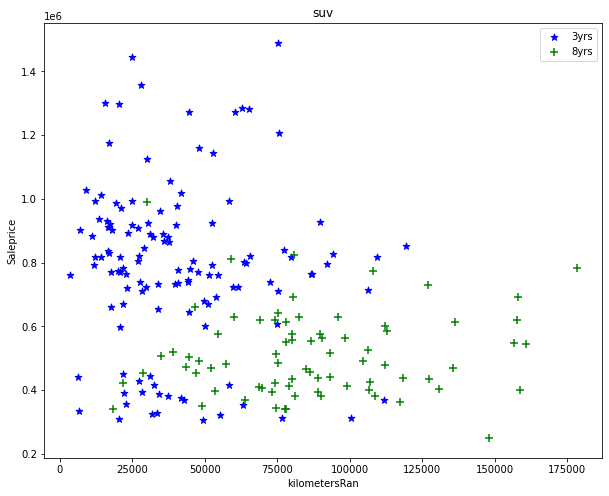

In [48]:
scatter_plot(dff,'suv')   

In [53]:
df5[df['sale_price']>1000000]

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
62,hyundai creta,diesel,78027,1149984,noida,1175,suv,automatic,1.6 crdi sx plus auto,True,...,in_stock,2,1068000,great,True,26711,172498,False,False,2.0
68,audi q3,diesel,66027,1332390,noida,3871,luxury suv,manual,2.0 tdi quattro mt,True,...,in_stock,1,1184213,great,True,30948,199859,False,False,7.0
77,audi q3,diesel,90959,1103827,noida,3892,luxury suv,manual,2.0 tdi,True,...,in_stock,1,1127710,great,True,25639,165575,False,False,7.0
126,toyota innova crysta,diesel,42841,1415109,noida,1528,suv,manual,2.4 gx 7 str,True,...,in_transit,1,1422217,great,True,32869,212267,False,False,4.0
128,mahindra scorpio,diesel,59831,1092313,noida,3284,suv,manual,s10,True,...,in_stock,1,1093292,great,True,25372,163847,False,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,jeep compass,diesel,46533,1226744,ghaziabad,3776,luxury suv,manual,2.0 limited,True,...,in_stock,2,1265689,great,True,28494,184012,True,False,4.0
6247,mahindra xuv500,diesel,93769,1017371,ghaziabad,1552,luxury suv,manual,w10 fwd,True,...,in_stock,1,1061885,great,True,23631,152606,True,False,4.0
6248,bmw 3 series,diesel,59109,1469199,ghaziabad,4398,luxury sedan,automatic,320d,True,...,in_stock,1,1553589,great,True,34126,220380,True,False,6.0
6354,hyundai creta,diesel,57122,1098575,lucknow,1863,suv,automatic,1.6 crdi sx plus auto,True,...,in_stock,1,1111090,great,True,25517,164787,False,False,4.0


- keeping in mind that target customers that we have is upper and middel class families lets restrict the price to 10 laks only 

In [54]:
df6=df5[df['sale_price']<1000000]
df6.shape

(5491, 26)

In [55]:
df7=df6[df['yr_mfr']>2005]

In [56]:
df7.shape

(5481, 26)

In [57]:
df8=df7[df7['broker_quote']<1000000]
df8.shape

(5450, 26)

In [58]:
df8[df8['times_viewed']>15000]

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,...,in_stock,2,397677,great,True,8975,57960,False,False,6.0
594,renault kwid,petrol,6190,368799,bengaluru,16915,hatchback,manual,rxt opt,False,...,in_stock,1,374278,great,True,8566,55320,False,False,5.0
618,maruti alto,petrol,17312,233599,bengaluru,15859,hatchback,manual,lxi,False,...,in_stock,1,233400,great,True,5426,35040,False,False,9.0
726,honda brio,petrol,30556,360999,bengaluru,35414,hatchback,manual,1.2 s mt i vtec,False,...,in_stock,2,343685,great,True,8385,54150,False,False,9.0
1659,maruti s presso,petrol,3500,404699,new delhi,17910,hatchback,manual,vxi,True,...,in_stock,1,395000,great,True,9400,60705,False,False,1.0
2416,honda city,petrol,83764,623899,new delhi,17476,sedan,automatic,sv cvt petrol,True,...,in_stock,1,620932,great,True,14492,93585,True,False,5.0
2645,honda brio,petrol,14170,361699,mumbai,15681,hatchback,manual,1.2 s mt i vtec,True,...,in_stock,1,354974,great,True,8401,54255,False,False,6.0
2649,hyundai i20,petrol,46859,263499,mumbai,15314,hatchback,manual,sportz 1.2 vtvt,True,...,in_stock,3,267885,great,True,6120,39525,False,False,8.0
3241,datsun redi go,petrol,29730,306899,mumbai,32019,hatchback,manual,1.0 s at,True,...,in_stock,1,292564,great,True,7128,46035,False,False,3.0
3598,maruti alto k10,petrol,21023,160199,mumbai,16294,hatchback,manual,vxi,True,...,in_stock,2,163000,great,True,3721,24030,True,False,9.0


In [59]:
df9=df8[df8['times_viewed']<15000]
df9.shape

(5431, 26)

# After removing outliers

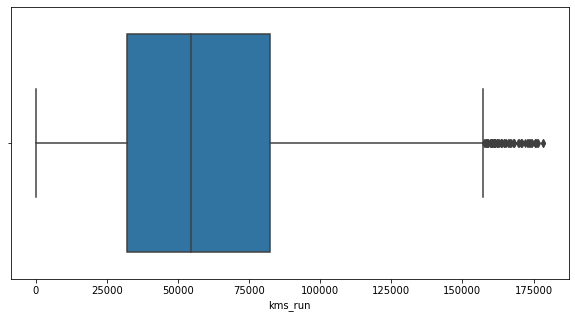

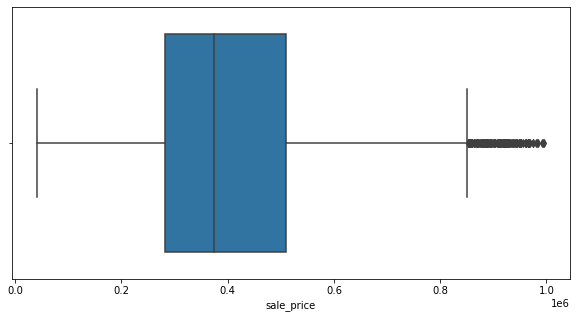

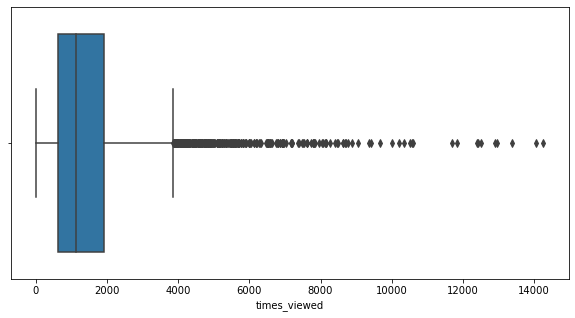

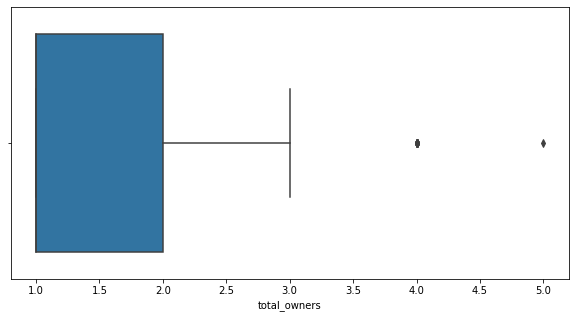

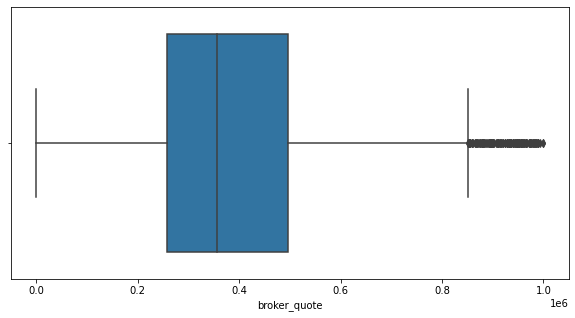

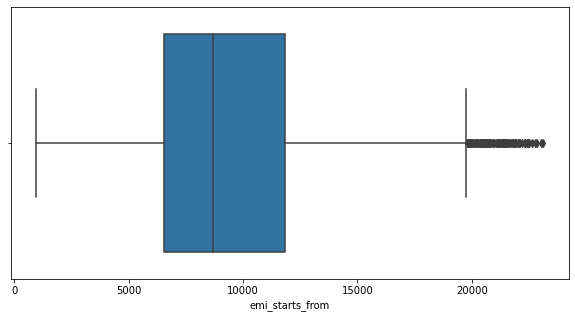

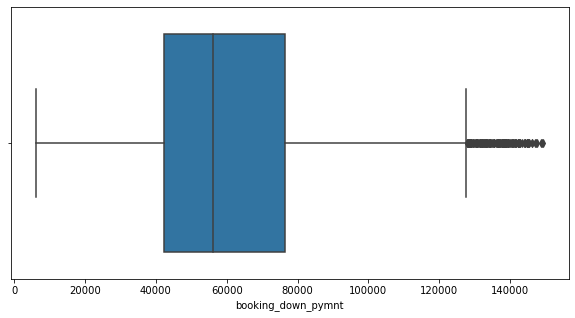

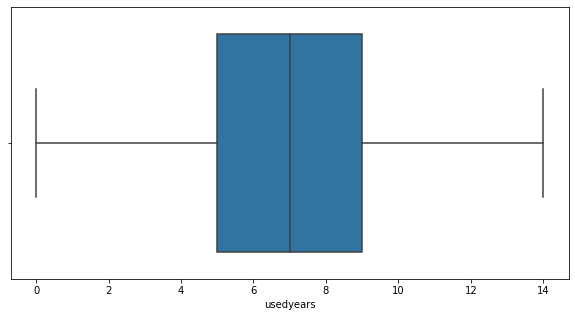

In [61]:
for fet in int_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df9[fet])

# Complete Exploratory Data Analysis 

<AxesSubplot:title={'center':'Variation in sales by age of the Car'}, xlabel='Age(In years used)', ylabel='Salesprice'>

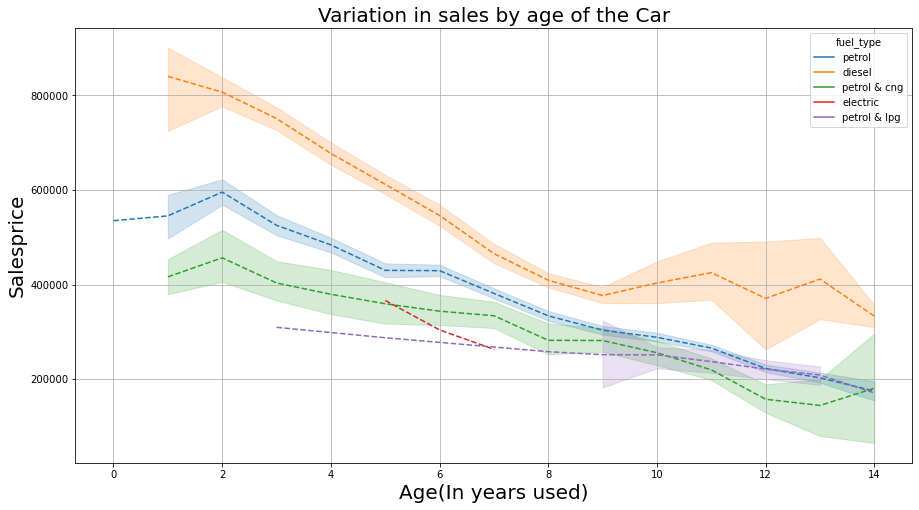

In [63]:
plt.figure(figsize=(15,8))
plt.title("Variation in sales by age of the Car",fontsize='20')
plt.xlabel("Age(In years used)",fontsize='20')
plt.ylabel('Salesprice',fontsize='20')
plt.grid()
sns.lineplot(x='usedyears',y='sale_price',data=df9,hue='fuel_type',linestyle='--')

<AxesSubplot:title={'center':'Price vs Owners'}, xlabel='total_owners', ylabel='sale_price'>

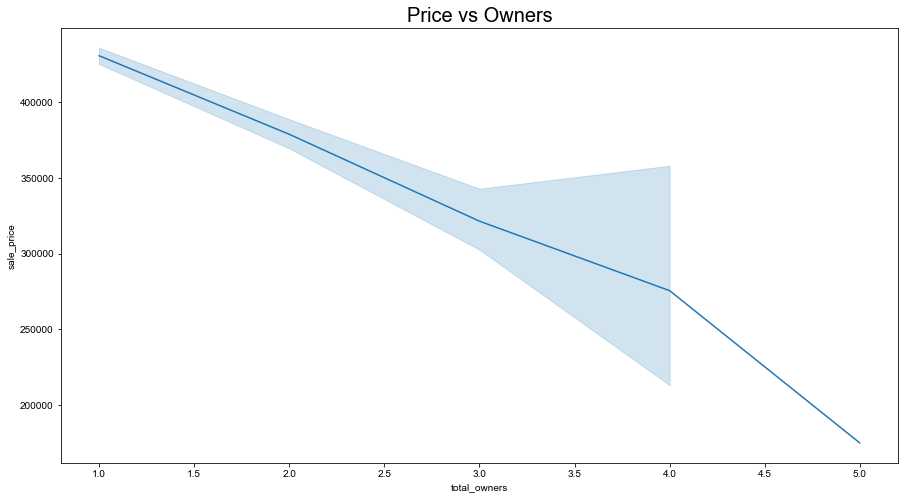

In [64]:
plt.figure(figsize=(15,8))
plt.title("Price vs Owners",fontsize='20')
sns.set(rc={'axes.facecolor':'#F5CBA7','axes.grid': True,'xtick.labelsize':10})
sns.lineplot(x='total_owners',y='sale_price',data=df9)

<AxesSubplot:xlabel='total_owners', ylabel='sale_price'>

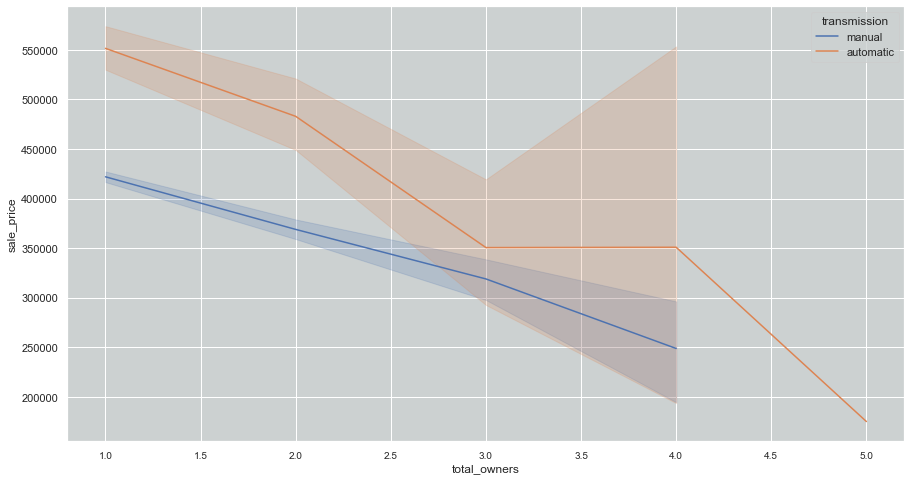

In [65]:
plt.figure(figsize=(15,8))
sns.set(rc={'axes.facecolor':'#CCD1D1','axes.grid': True,'xtick.labelsize':10})
sns.lineplot(x='total_owners',y='sale_price',data=df9,hue='transmission')

- mean sales prices of all the bodytypes and fueltypes

In [66]:
tab=df9.groupby(by=['body_type','fuel_type'])['sale_price'].mean()
tab=pd.DataFrame(tab)
tab

sale_price
body_type    fuel_type                  
hatchback    diesel        398875.047131
             electric      299199.000000
             petrol        350873.093233
             petrol & cng  292149.795812
             petrol & lpg  231319.033333
luxury sedan diesel        621539.166667
             petrol        515751.657895
             petrol & cng  399699.000000
luxury suv   diesel        703821.563380
             petrol        661632.333333
             petrol & cng  296799.000000
sedan        diesel        459130.255125
             petrol        440337.112698
             petrol & cng  340053.250000
             petrol & lpg  284599.000000
suv          diesel        663596.941176
             petrol        586899.627329
             petrol & cng  432260.936508
             petrol & lpg  285349.000000

In [67]:
tab1=df9.groupby('assured_buy')['sale_price'].mean()
tab1=pd.DataFrame(tab1)
tab1

,sale_price
assured_buy,
False,406996.056579
True,415430.630700


### exploring the data by the dataset that we saved initially

In [68]:
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,True,8975,57960,False,False,6.0
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,True,6167,39825,False,False,5.0
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,True,7154,46200,False,False,8.0
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,True,8397,54225,False,False,6.0
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,3,319200,410764.0,great,True,7468,48225,False,False,9.0


In [69]:
df_drop.isnull().sum()

id                     0
car_name               0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
original_price         0
car_rating             0
fitness_certificate    0
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
usedyears              0
dtype: int64

### Creating a new features:
- pricedrop
- price drop by year 
- price drop percent by year 

##### To clearly understand how the price of car is dropping each year and how are they effecting the final sales price 

In [70]:
df_drop['pricedrop']=df_drop['original_price']-df_drop['sale_price']

In [71]:
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,broker_quote,original_price,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears,pricedrop
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,397677,404177.0,great,True,8975,57960,False,False,6.0,17778.0
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,272935,354313.0,great,True,6167,39825,False,False,5.0,88814.0
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,294262,374326.0,great,True,7154,46200,False,False,8.0,66327.0
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,360716,367216.0,great,True,8397,54225,False,False,6.0,5717.0
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,319200,410764.0,great,True,7468,48225,False,False,9.0,89265.0


In [72]:
df_drop['price_drop_by_year']=df_drop['pricedrop']/df_drop['usedyears']
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,original_price,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears,pricedrop,price_drop_by_year
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,404177.0,great,True,8975,57960,False,False,6.0,17778.0,2963.000000
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,354313.0,great,True,6167,39825,False,False,5.0,88814.0,17762.800000
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,374326.0,great,True,7154,46200,False,False,8.0,66327.0,8290.875000
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,367216.0,great,True,8397,54225,False,False,6.0,5717.0,952.833333
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,410764.0,great,True,7468,48225,False,False,9.0,89265.0,9918.333333


### The mean price drop of each model every year 

In [73]:
df_drop.groupby('body_type')['price_drop_by_year'].mean()

body_type
hatchback        9088.503888
luxury sedan     8595.825823
luxury suv      15414.215728
sedan           10099.215532
suv             19482.785154
Name: price_drop_by_year, dtype: float64

In [74]:
df_drop['Drop_percent_each_year']=df_drop['price_drop_by_year']/df_drop['original_price']*100

In [75]:
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears,pricedrop,price_drop_by_year,Drop_percent_each_year
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,great,True,8975,57960,False,False,6.0,17778.0,2963.000000,0.733095
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,great,True,6167,39825,False,False,5.0,88814.0,17762.800000,5.013307
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,great,True,7154,46200,False,False,8.0,66327.0,8290.875000,2.214881
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,great,True,8397,54225,False,False,6.0,5717.0,952.833333,0.259475
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,great,True,7468,48225,False,False,9.0,89265.0,9918.333333,2.414606


### The mean pricedrop % of a car for the bodytypes

In [76]:
df_drop.groupby('body_type')['Drop_percent_each_year'].mean()

body_type
hatchback       1.872483
luxury sedan    0.765124
luxury suv      1.148807
sedan           1.639474
suv             2.414410
Name: Drop_percent_each_year, dtype: float64

In [77]:
df_drop.groupby('usedyears')['pricedrop'].mean()

usedyears
1.0     82750.393939
2.0     77841.248521
3.0     66980.366102
4.0     61555.872521
5.0     49937.852041
6.0     51658.792271
7.0     41680.885057
8.0     44577.924282
9.0     38551.193220
10.0    22588.838384
11.0    21601.821192
12.0    20230.197368
13.0    21847.755102
14.0    18536.142857
Name: pricedrop, dtype: float64

In [78]:
df_drop.groupby('usedyears')['sale_price'].mean()

usedyears
1.0     513243.000000
2.0     651977.911243
3.0     642884.166102
4.0     630836.662890
5.0     531687.209184
6.0     529947.760870
7.0     451884.252874
8.0     388592.644909
9.0     363548.610169
10.0    308551.232323
11.0    265528.139073
12.0    247468.736842
13.0    199076.551020
14.0    177384.714286
Name: sale_price, dtype: float64

### Checking for the correlation :

In [79]:
df_cor=df_drop['Drop_percent_each_year'].corr(df_drop['sale_price'])
df_cor

0.06415629033055806

In [80]:
df_corr=df_drop['price_drop_by_year'].corr(df_drop['sale_price'])
df_corr

0.32658119645905875

In [81]:
df_corr1=df_drop['price_drop_by_year'].corr(df_drop['kms_run'])
df_corr1

-0.16744202035632205

<AxesSubplot:xlabel='pricedrop', ylabel='usedyears'>

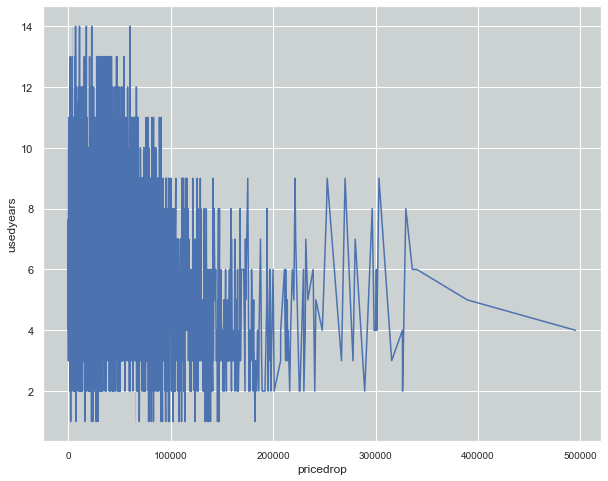

In [82]:
sns.lineplot(x='pricedrop',y='usedyears',data=df_drop)

In [83]:
df_corr2=df_drop['price_drop_by_year'].corr(df_drop['total_owners'])
df_corr2

-0.12522459690641874

In [84]:
tot_corr=df_drop['pricedrop'].corr(df_drop['usedyears'])
tot_corr

-0.28347354827633336

In [85]:
df_drop.describe()

,id,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,usedyears,pricedrop,price_drop_by_year,Drop_percent_each_year
count,3163.000000,3163.000000,3.163000e+03,3163.000000,3163.000000,3.163000e+03,3.163000e+03,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,3367.040152,61347.947834,4.779016e+05,1819.182738,1.277585,4.734471e+05,5.258813e+05,11100.460322,71685.399304,6.498577,47979.731584,11141.353828,1.871954
std,1949.078917,40355.324888,2.716989e+05,2151.188540,0.519171,2.858629e+05,2.926530e+05,6310.889068,40754.876643,2.770173,52163.881154,17887.957285,2.438596
min,1.000000,1139.000000,9.249900e+04,23.000000,1.000000,8.726700e+04,1.150990e+05,2149.000000,13875.000000,1.000000,64.000000,7.692308,0.000978
25%,1722.500000,31532.500000,3.021490e+05,782.000000,1.000000,2.858735e+05,3.337885e+05,7018.000000,45322.500000,4.000000,5709.000000,843.071429,0.213716
50%,3557.000000,54844.000000,4.072990e+05,1342.000000,1.000000,3.974770e+05,4.520700e+05,9461.000000,61095.000000,6.000000,33376.000000,4933.250000,1.161708
75%,5145.500000,83419.500000,5.720490e+05,2194.000000,1.000000,5.705845e+05,6.340980e+05,13287.500000,85807.500000,8.000000,74755.500000,13181.700000,2.584493
max,6388.000000,428123.000000,2.585899e+06,46141.000000,4.000000,2.729327e+06,2.765057e+06,60064.000000,387885.000000,14.000000,495286.000000,182421.000000,24.358838


<AxesSubplot:xlabel='kms_run', ylabel='usedyears'>

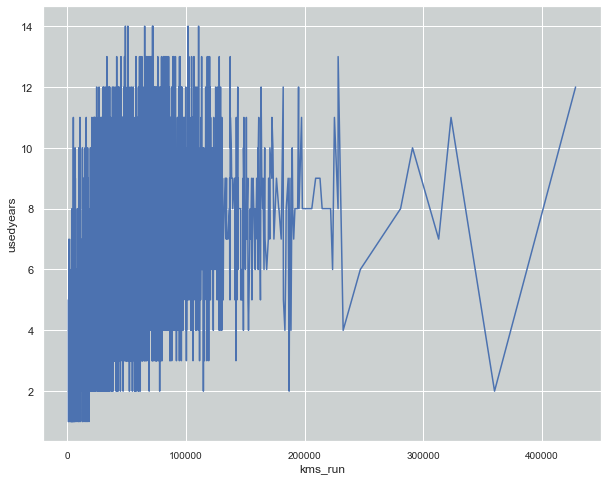

In [86]:
sns.lineplot(x='kms_run',y='usedyears',data=df_drop)

In [87]:
df_drop.groupby('usedyears')['kms_run'].mean()

usedyears
1.0      7059.787879
2.0     24311.538462
3.0     35239.732203
4.0     45743.980170
5.0     54734.428571
6.0     63851.113527
7.0     70714.922414
8.0     79346.553525
9.0     81177.681356
10.0    72946.343434
11.0    72613.192053
12.0    81979.052632
13.0    84917.755102
14.0    74721.142857
Name: kms_run, dtype: float64

<AxesSubplot:>

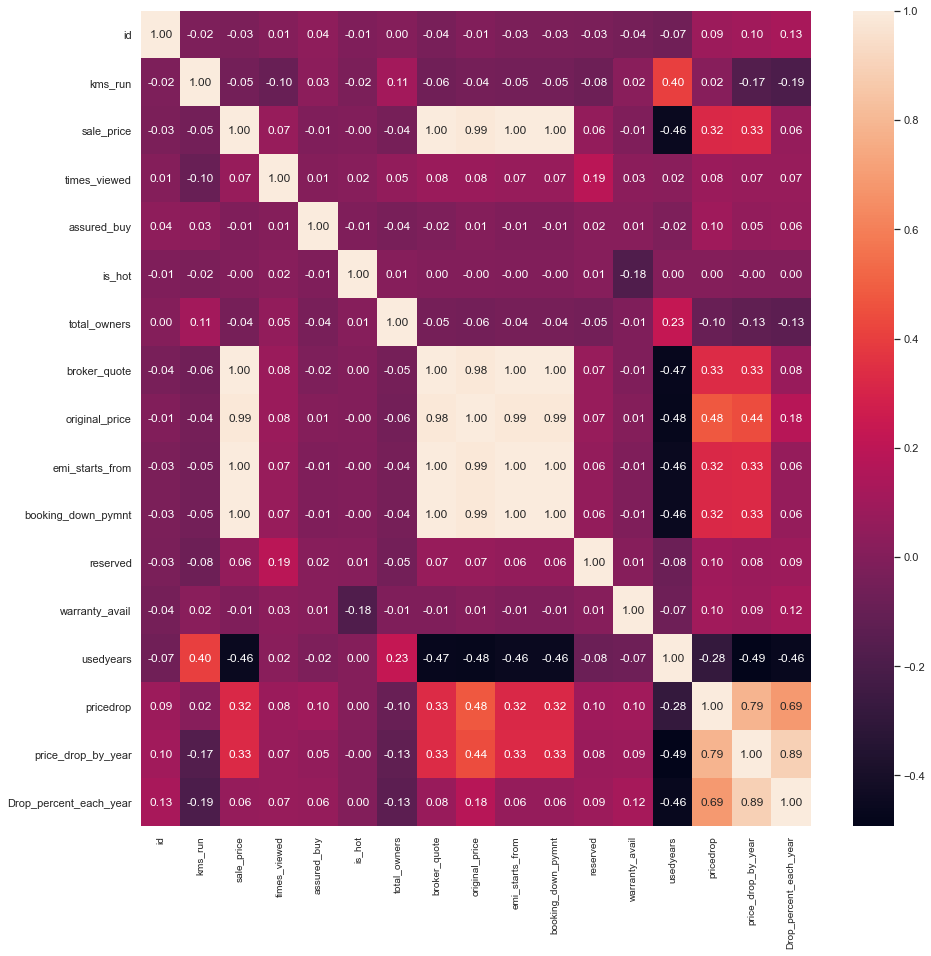

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(df_drop.corr(),annot=True,fmt='.2f')

### Observing that broker_quote is the direclty effecting the sale price , but we have no data on what bases brokers are quoting the price , on number of owners or original price or number of years used or number of km run ... at this point of time we are unable to trace that 


In [89]:
df_drop.broker_quote.mean()

473447.0803035093

<AxesSubplot:xlabel='body_type'>

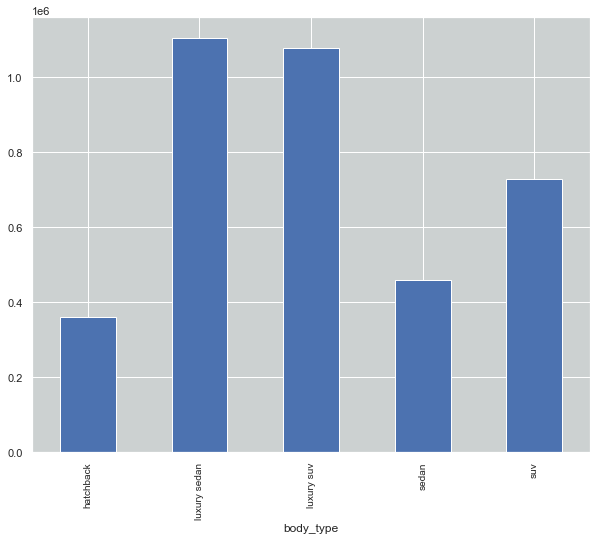

In [90]:
bro_quote=df_drop.groupby('body_type')['broker_quote'].mean()
bro_quote.plot(kind='bar')

### Converting a features into catagorical data to more analysis 

In [91]:
df_drop['driven_status']=pd.cut(df_drop['kms_run'],[0,25000,75000,150000,250000],
                               labels=['lessdriven','moderatlydriven','heavelydriven','driven a lot'])

In [92]:
df_drop.driven_status.isnull().sum()

6

In [93]:
df_drop.describe(include=object)

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,fitness_certificate
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,124,4,13,5,2,481,157,10,188,2,21,124,4,3,2
top,maruti swift,petrol,new delhi,hatchback,manual,vxi,delhi,maharashtra,gj01,inperson_sale,maruti,swift,in_stock,great,True
freq,303,1909,480,1908,2833,314,402,699,130,3161,1519,303,3035,2937,3156


In [94]:
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears,pricedrop,price_drop_by_year,Drop_percent_each_year,driven_status
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,True,8975,57960,False,False,6.0,17778.0,2963.000000,0.733095,lessdriven
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,True,6167,39825,False,False,5.0,88814.0,17762.800000,5.013307,lessdriven
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,True,7154,46200,False,False,8.0,66327.0,8290.875000,2.214881,moderatlydriven
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,True,8397,54225,False,False,6.0,5717.0,952.833333,0.259475,lessdriven
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,True,7468,48225,False,False,9.0,89265.0,9918.333333,2.414606,moderatlydriven


In [95]:
df_drop.driven_status.value_counts()

moderatlydriven    1585
heavelydriven       908
lessdriven          575
driven a lot         89
Name: driven_status, dtype: int64

In [96]:
df_drop.driven_status=df_drop.driven_status.fillna(df_drop.driven_status.mode()[0])

<AxesSubplot:xlabel='sale_price', ylabel='driven_status'>

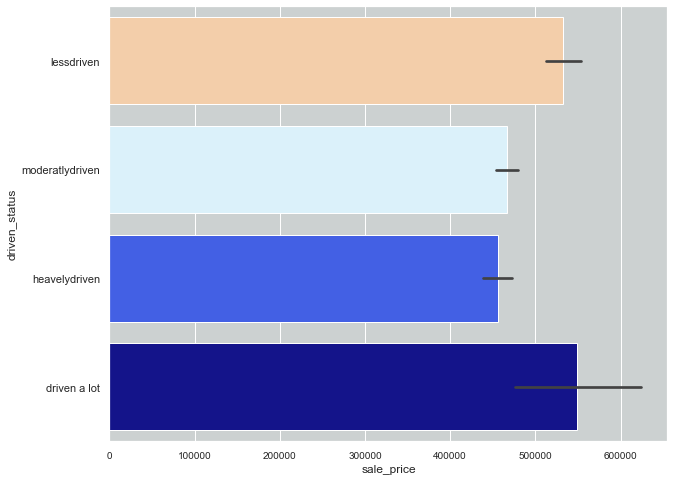

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(y='driven_status',x='sale_price',data=df_drop,palette='flag')

### Surprizingly we see that price of the lessdriven car and driven a lot are almost same 

Text(0.5, 1.0, 'Distribution of salesprice over kilometers driven')

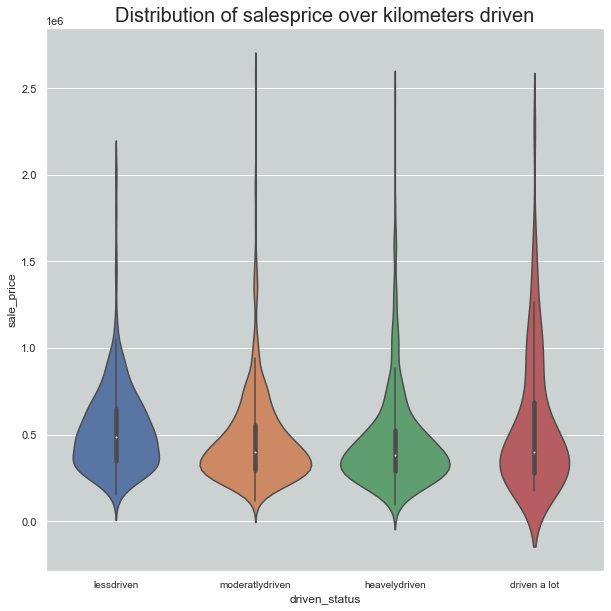

In [100]:
plt.figure(figsize=(10,10))
sns.violinplot(x='driven_status',y='sale_price',data=df_drop)
plt.title("Distribution of salesprice over kilometers driven", fontsize='20')

# lets understand the same with the Monthly_EMI 

<AxesSubplot:xlabel='emi_starts_from', ylabel='driven_status'>

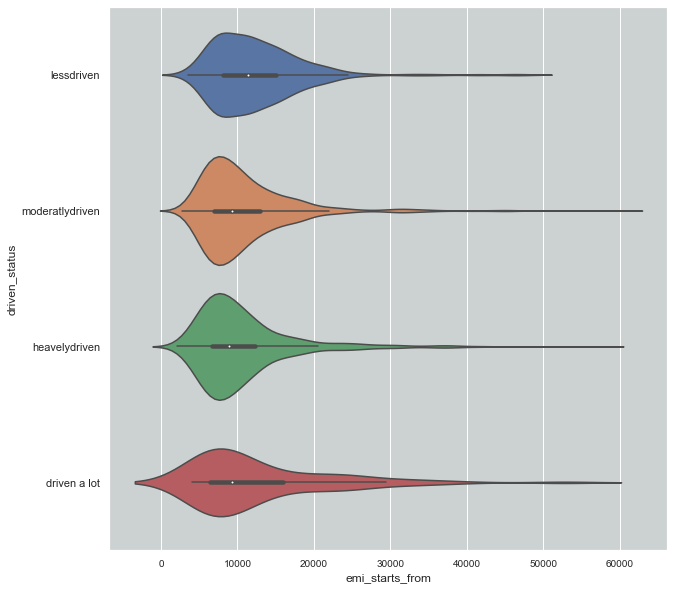

In [102]:
plt.figure(figsize=(10,10))
sns.violinplot(y='driven_status',x='emi_starts_from',data=df_drop,orient ='h',subplots=True)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000002C777739460>>

<Figure size 720x720 with 0 Axes>

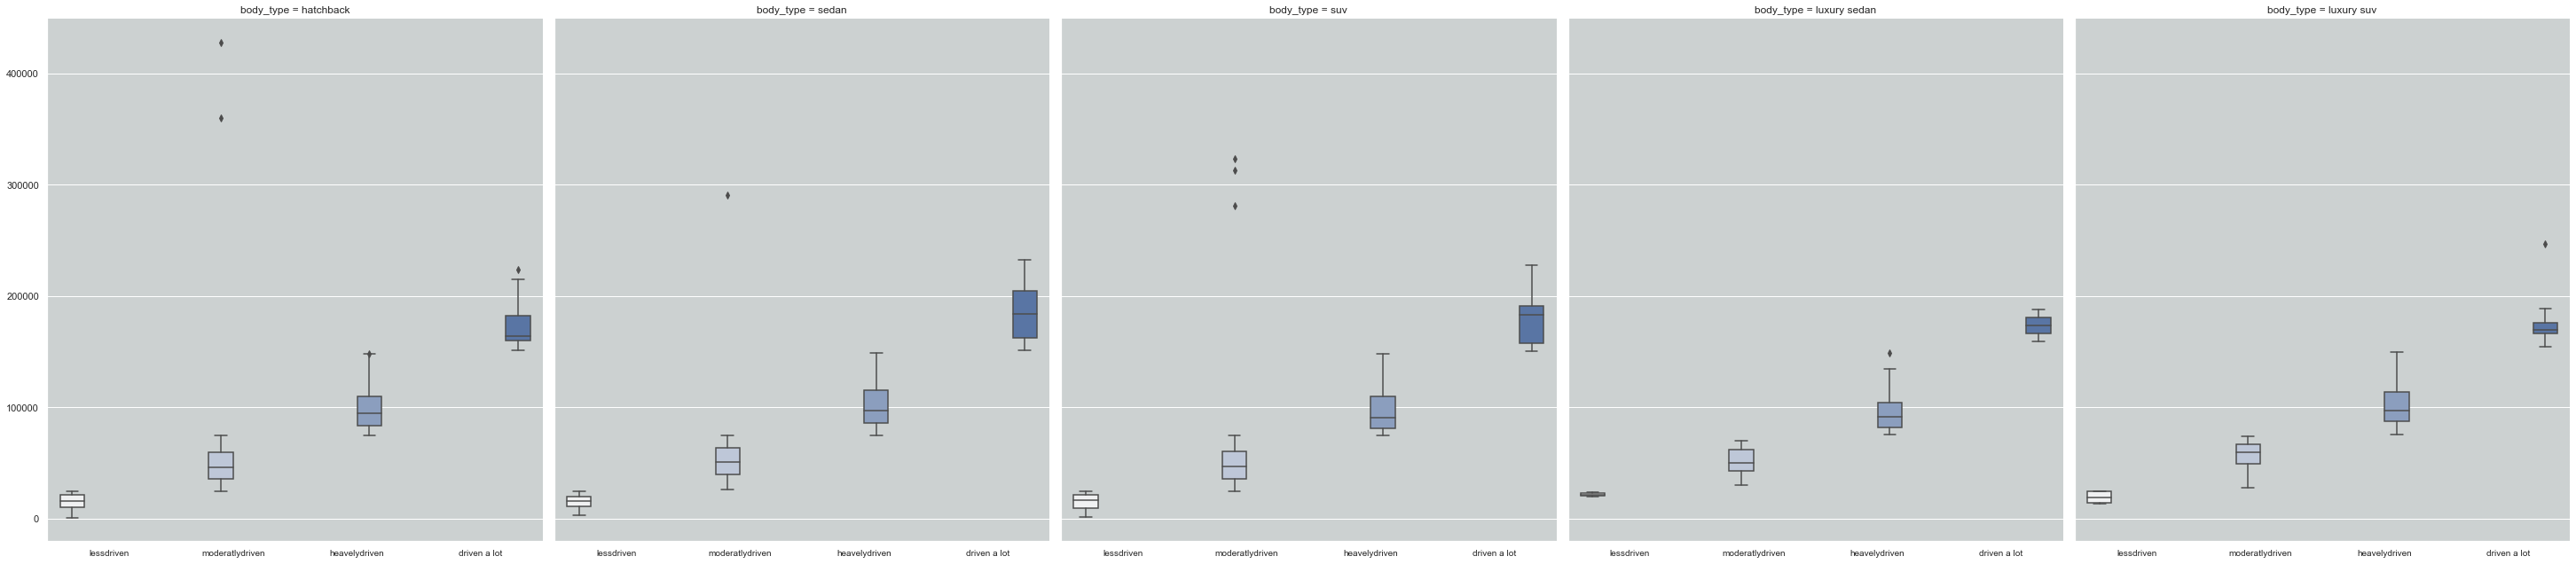

In [110]:
fig=sns.FacetGrid(df_drop,col='body_type',height=9.0,aspect=.90)
fig.map_dataframe(sns.boxplot,x='driven_status',y='kms_run',hue='driven_status')
fig.add_legend

In [111]:
df_drop['car_age']=pd.cut(df_drop['usedyears'],[0,3,8,14],labels=['newcar','middleagecar','oldcar'])

In [112]:
df_drop.car_age.value_counts()

middleagecar    1890
oldcar           776
newcar           497
Name: car_age, dtype: int64

In [113]:
df_drop.car_age.isnull().sum()

0

<AxesSubplot:xlabel='sale_price', ylabel='car_age'>

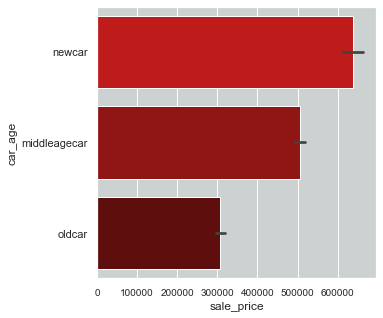

In [114]:
plt.figure(figsize=(5,5))
sns.barplot(y='car_age',x='sale_price',data=df_drop,palette='flag')

### so the price of the car is decresing by age 

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000002C717786640>>

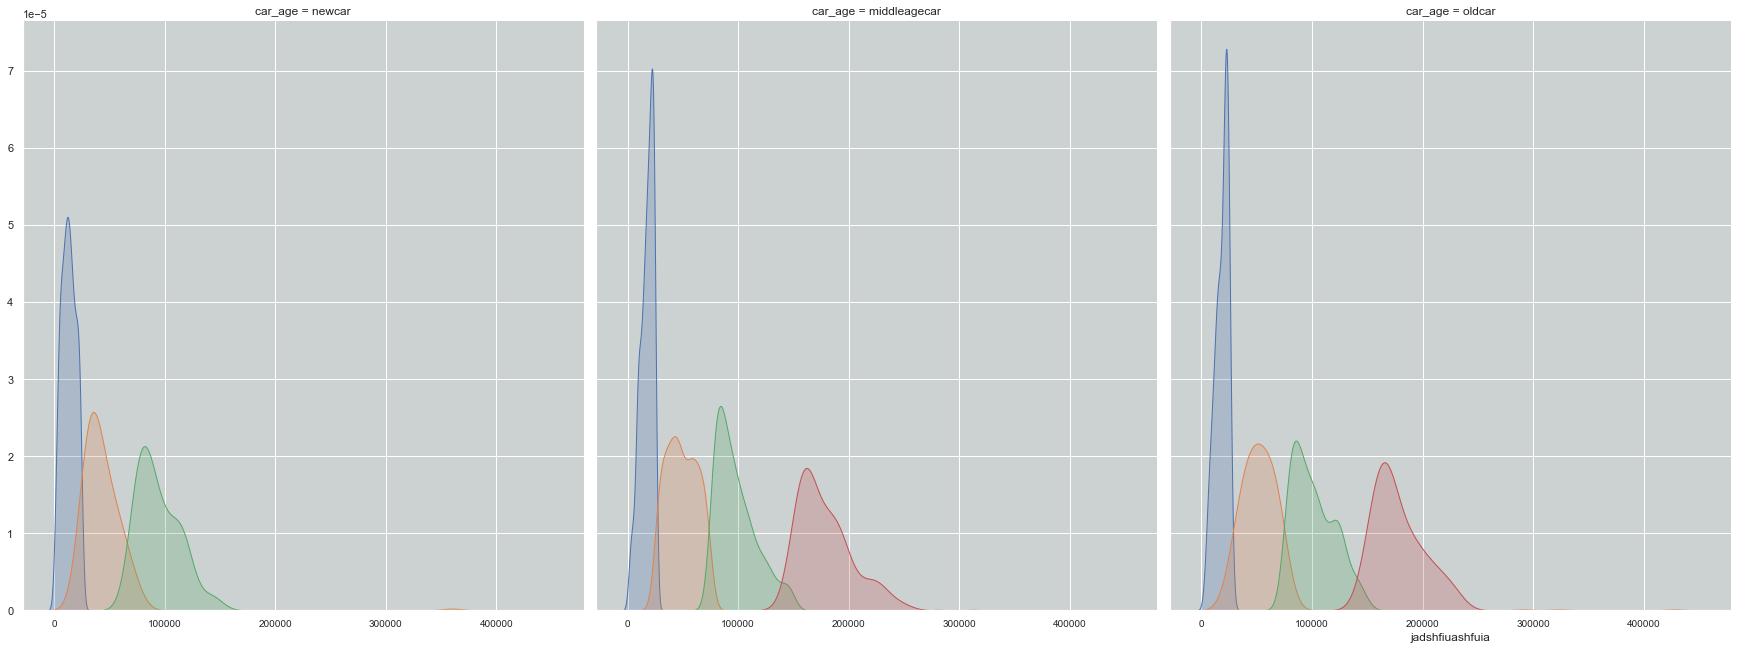

In [200]:
fig=sns.FacetGrid(df_drop,col='car_age',hue='driven_status', height=9.0,aspect=.90)
fig.map_dataframe(sns.kdeplot,x='kms_run',shade=True)
fig.
fig.add_legend

Text(0.5, 1.0, 'Driving status and price')

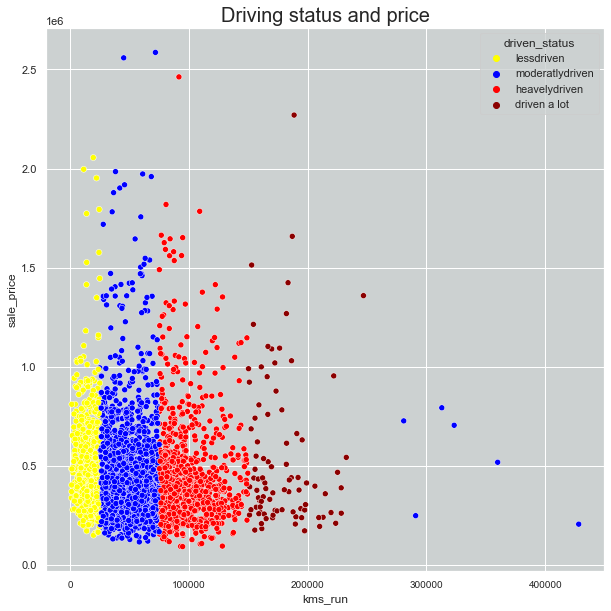

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='kms_run',y='sale_price',
               hue='driven_status',
               data=df_drop,
               palette=['#FFFF00','#0000FF','#FF0000','#8b0000'])
plt.title('Driving status and price',fontsize='20')

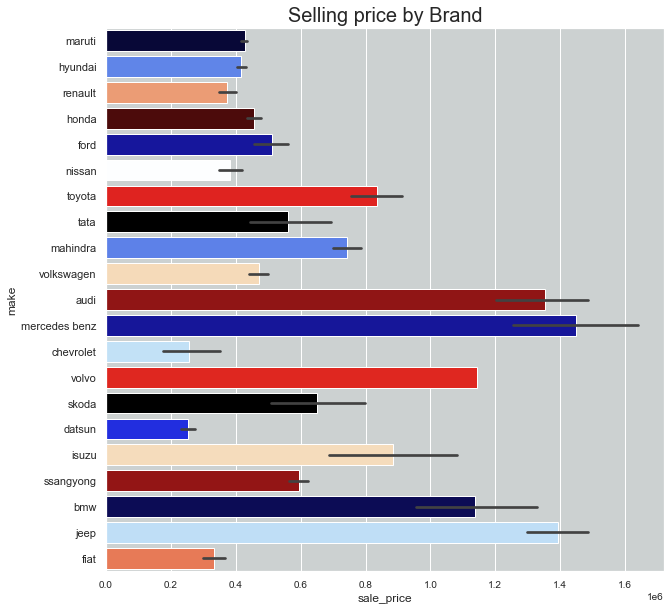

In [130]:
plt.figure(figsize=(10,10))
sns.barplot(y='make',x='sale_price',data=df_drop,palette='flag')
plt.title("Selling price by Brand",fontsize='20')
plt.show()

Text(0.5, 1.0, 'Odometers of Brand')

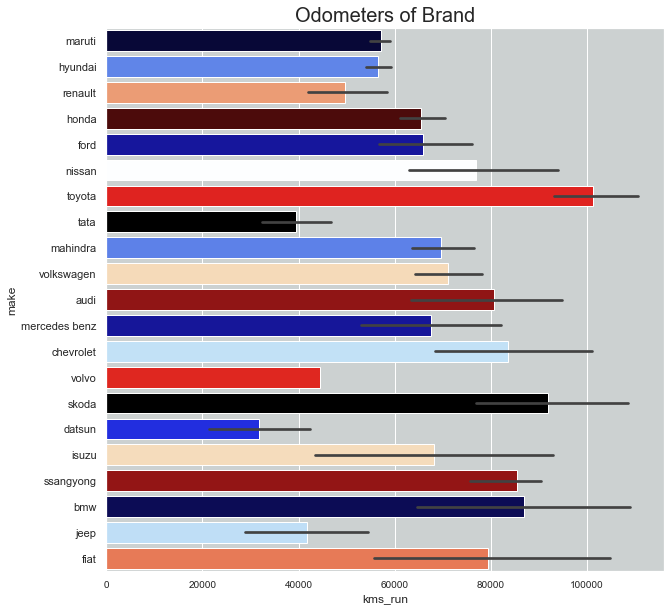

In [131]:
plt.figure(figsize=(10,10))
sns.barplot(y='make',x='kms_run',data=df_drop,palette='flag')
plt.title("Odometers of Brand",fontsize='20')

* very carefully observe that brands like audi ,BMW ,jeep, are moderatley driven but have good sales price 

* Brands like maruthi , nissan , tata ,honda, fiat ,renault ..and few other are driven less but still the price is lower then luxary brands 

Text(0.5, 1.0, 'Brandvalue impacting price')

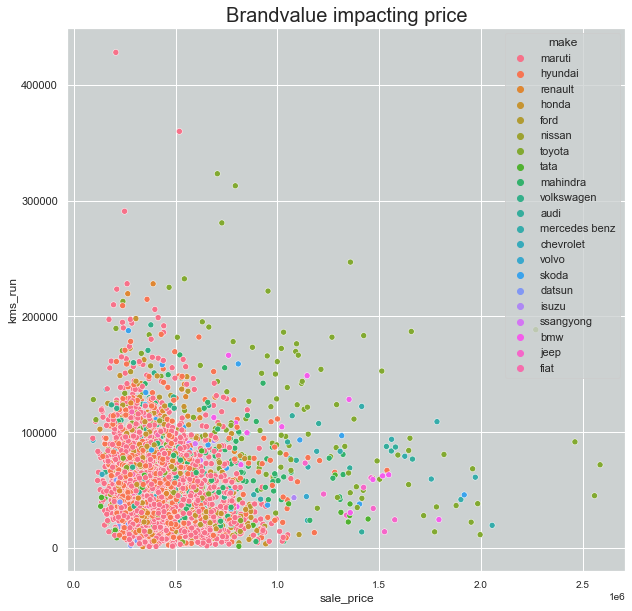

In [136]:
# Lets try and find the sales price vs kilometers driven by makers 
plt.figure(figsize=(10,10))
sns.scatterplot(x='sale_price',
               y='kms_run',
               data=df_drop,
               hue='make')
plt.title('Brandvalue impacting price',fontsize='20')

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000002C77B860850>>

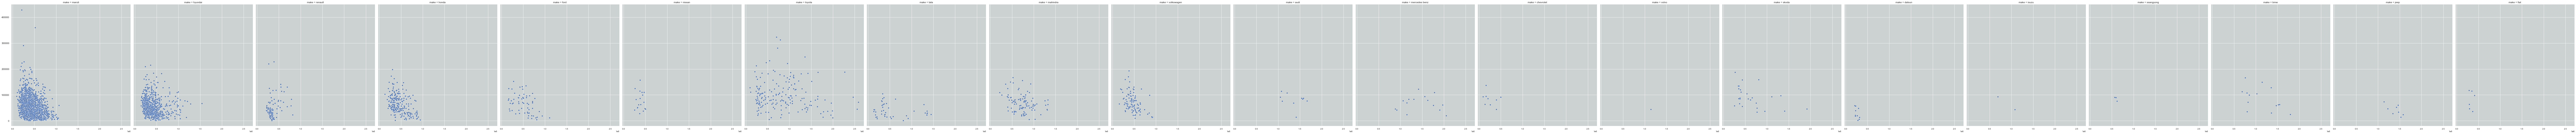

In [142]:

fig=sns.FacetGrid(df_drop,col='make',height=9.0,aspect=.90)
fig.map_dataframe(sns.scatterplot,x='sale_price',y='kms_run',)
fig.add_legend

In [132]:
maker_car=df_drop.groupby(by=['make','body_type'])['body_type'].count()
maker_car=pd.DataFrame(maker_car)
maker_car

body_type
make          body_type              
audi          luxury sedan          4
              luxury suv            6
bmw           luxury sedan          7
              luxury suv            7
chevrolet     hatchback             6
              luxury sedan          2
              suv                   1
datsun        hatchback            12
fiat          hatchback             6
ford          hatchback            17
              sedan                 5
              suv                  39
honda         hatchback            68
              luxury suv            2
              sedan               149
              suv                  17
hyundai       hatchback           583
              luxury sedan          1
              luxury suv            1
              sedan                75
              suv                  38
isuzu         luxury suv            1
              suv                   1
jeep          luxury suv            8
mahindra      luxury suv           47
              suv                  55
maruti        hatchback          1009
              sedan               277
              suv                 233
mercedes benz luxury sedan         12
              luxury suv            3
nissan        hatchback             5
              sedan                 7
              suv                   6
renault       hatchback            66
              sedan                 1
              suv                  30
skoda         hatchback             1
              luxury sedan         10
              sedan                15
ssangyong     luxury suv            3
tata          hatchback            26
              sedan                 3
              suv                  13
toyota        hatchback            35
              luxury sedan         18
              luxury suv           29
              sedan                26
              suv                  72
volkswagen    hatchback            74
              sedan                30
volvo         luxury sedan          1

In [133]:
df_drop.head()

,id,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears,pricedrop,price_drop_by_year,Drop_percent_each_year,driven_status,car_age
0,1,maruti swift,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,8975,57960,False,False,6.0,17778.0,2963.000000,0.733095,lessdriven,middleagecar
1,2,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,6167,39825,False,False,5.0,88814.0,17762.800000,5.013307,lessdriven,middleagecar
3,4,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,7154,46200,False,False,8.0,66327.0,8290.875000,2.214881,moderatlydriven,middleagecar
4,5,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,8397,54225,False,False,6.0,5717.0,952.833333,0.259475,lessdriven,middleagecar
7,8,hyundai i20,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,7468,48225,False,False,9.0,89265.0,9918.333333,2.414606,moderatlydriven,oldcar


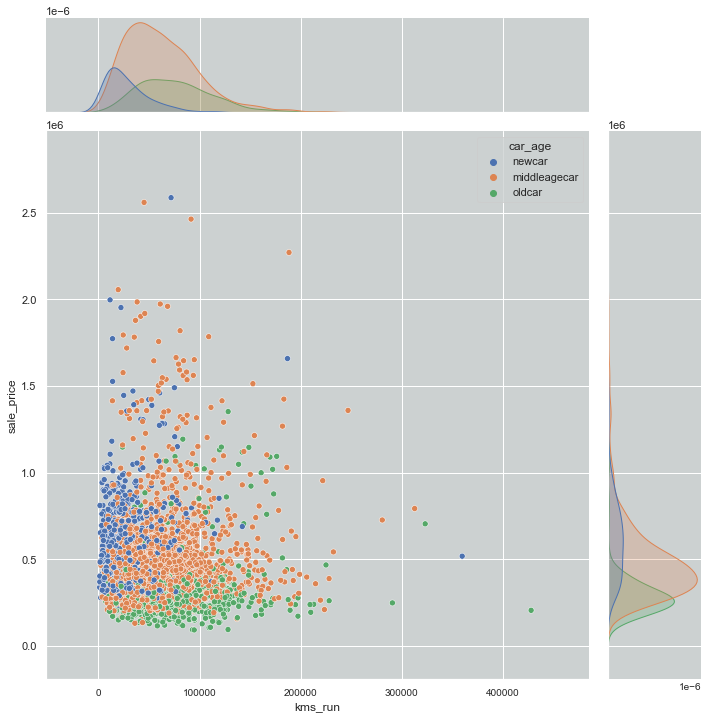

In [143]:
#sns.set(rc={"figure.figsize":(10, 10)})
sns.jointplot(x="kms_run",y="sale_price",data=df_drop,kind="scatter",hue="car_age",height=10)

## Observe that :
- Most of the cars in the bracket of (0,200000) on x axis and (0,1) on y axis 
- Also clearly observe that most of the blue datapoints are pointed towards that y axis and not much spread on x axis indicating that new cars less driven are having good price.
- And observe the same with the orenge and green datapoints ,orenge points are linearly growing (most deviated to x axis ) indicating that price actually kept constant for certain kilometers even number is increasing.

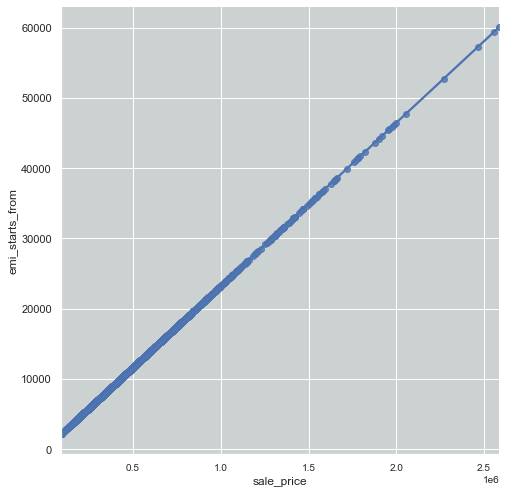

In [144]:
sns.lmplot(x='sale_price',y='emi_starts_from',data=df_drop,height=7)

In [145]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,397677,404177.0,great,2021.0,True,8975,57960,False,False,6.0
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,272935,354313.0,great,2021.0,True,6167,39825,False,False,5.0
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,469605,NaN,great,2021.0,True,11096,71655,False,False,4.0
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,294262,374326.0,great,2021.0,True,7154,46200,False,False,8.0
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,360716,367216.0,great,2021.0,True,8397,54225,False,False,6.0


In [146]:
#plt.figure(figsize=(10,10))
#sns.barplot(y='yr_mfr',x='kms_run',data=df,palette='flag')

# ANALYSIS REPORT

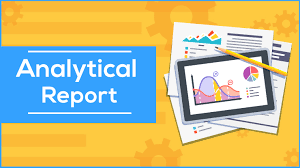

- Most of the cars are off petrol type 
- Most of the cars are manual type and hatchbacks made in Maharashtra 
- Maruthi is having  highest number of cars 
- The mean sales price of the cars is in between 4 lacs to 5 lacs in all the cities 
- The average kilometres each car has run is around 62,000 
- Sales price of a car is decreasing from the number of owners 
- As the number of kilometres increased the price of the car went down and down 
- Price of the car and the number of years it is used are inversely related 
- Mean sale price of the assured car is little higher then not assured one 
### Conclude: ***To increase the saleprice at  Truevalue you have to offer the cars that are hatchback type and manual transmission with a petrol engine not more then 6year old and with less number owners and price should be ranging between 4 to 6 lakhs .***



# Feature Engineering 

In [147]:
df9.shape

(5431, 26)

In [148]:
df9.head()

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
1,maruti alto 800,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,...,in_stock,1,272935,great,True,6167,39825,False,False,5.0
2,hyundai grand i10,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,...,in_stock,1,469605,great,True,11096,71655,False,False,4.0
3,maruti swift,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,...,in_stock,1,294262,great,True,7154,46200,False,False,8.0
4,hyundai grand i10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,...,in_stock,1,360716,great,True,8397,54225,False,False,6.0
5,maruti alto k10,petrol,23534,335299,noida,1055,hatchback,manual,vxi (o) amt,True,...,in_stock,1,343212,great,True,7788,50295,False,False,3.0


In [149]:
# lebel encoding 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [150]:
obj=df9.select_dtypes(exclude=['int64','float64'])

In [151]:
for i in obj.columns:
    df9[i]=le.fit_transform(df9[i])

In [152]:
df9.head()

,car_name,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
1,66,2,23104,265499,11,2676,0,1,374,1,...,0,1,272935,2,1,6167,39825,0,0,5.0
2,38,2,23402,477699,11,609,0,1,466,1,...,0,1,469605,2,1,11096,71655,0,0,4.0
3,82,0,39124,307999,11,6511,0,1,529,1,...,0,1,294262,2,1,7154,46200,0,0,8.0
4,38,2,22116,361499,11,3225,0,1,395,0,...,0,1,360716,2,1,8397,54225,0,0,6.0
5,67,2,23534,335299,11,1055,0,1,555,1,...,0,1,343212,2,1,7788,50295,0,0,3.0


In [153]:
x=df9.drop('sale_price',axis='columns')
y=df9.sale_price

In [154]:
x.shape

(5431, 25)

In [155]:
x.head()

,car_name,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,...,car_availability,total_owners,broker_quote,car_rating,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,usedyears
1,66,2,23104,11,2676,0,1,374,1,132,...,0,1,272935,2,1,6167,39825,0,0,5.0
2,38,2,23402,11,609,0,1,466,1,1,...,0,1,469605,2,1,11096,71655,0,0,4.0
3,82,0,39124,11,6511,0,1,529,1,54,...,0,1,294262,2,1,7154,46200,0,0,8.0
4,38,2,22116,11,3225,0,1,395,0,130,...,0,1,360716,2,1,8397,54225,0,0,6.0
5,67,2,23534,11,1055,0,1,555,1,54,...,0,1,343212,2,1,7788,50295,0,0,3.0


In [156]:
y.shape

(5431,)

In [157]:
# feature importence
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)


ExtraTreesRegressor()

In [158]:
print(model.feature_importances_)

[2.07762064e-06 2.31514816e-04 2.12371735e-06 5.83986868e-06
 5.90427212e-06 7.81243200e-05 5.03307394e-07 3.09274196e-06
 1.21051215e-06 3.70583455e-06 5.30125298e-06 8.27902279e-05
 3.42204542e-06 2.22552162e-06 8.27255863e-06 4.70403505e-08
 1.91658449e-06 2.78265217e-01 4.39387417e-06 6.61710224e-05
 3.02981479e-01 4.11492943e-01 4.58240884e-07 2.43855865e-06
 6.74882698e-03]


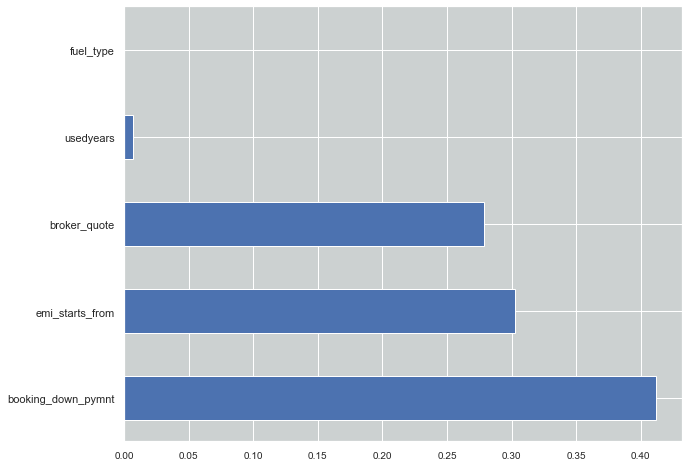

<Figure size 720x360 with 0 Axes>

In [159]:
fet_imp=pd.Series(model.feature_importances_,index=x.columns)
fet_imp.nlargest(5).plot(kind='barh')
plt.figure(figsize=(10,5))
plt.show()


In [160]:
x_sc=std.fit_transform(x)


In [161]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y,test_size=0.2,random_state=2)

In [162]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4344, 25)
(1087, 25)
(4344,)
(1087,)


# Linear Regression

In [163]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [164]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.coef_)
print(lr.intercept_)


[-2.42715433e-03  5.15616405e-04  1.01417390e-04  1.07703048e-03
 -9.92937540e-04  1.28699943e-04 -6.61920873e-04 -8.62428933e-04
 -5.40849242e-04 -4.44576976e-04  2.04905827e-04 -1.44815195e-01
 -7.48517176e-04  3.26724497e-03  4.02823047e-04  6.52010312e-05
  1.81340576e-04  2.58827883e-02  1.87046803e-03 -9.06083992e-04
 -8.64157412e+00  1.78161267e+05 -7.93553495e-04  1.98319723e-03
  1.79308703e-03]
414250.31846023124


<AxesSubplot:ylabel='Density'>

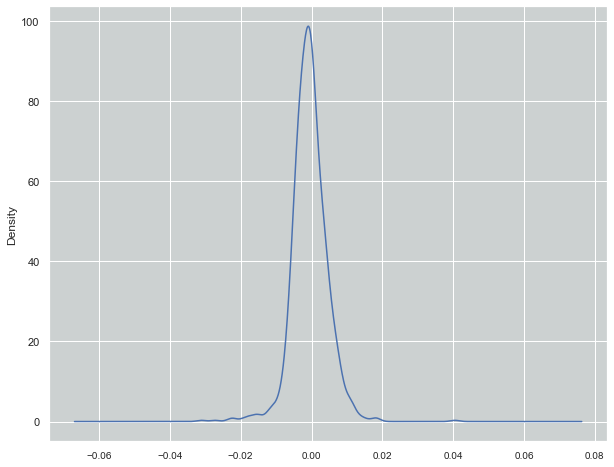

In [165]:
y_pred=lr.predict(xtest)
error=ytest-y_pred
error.plot(kind='kde')

In [166]:
tsc=lr.score(xtrain,ytrain)

In [167]:
sc=lr.score(xtest,ytest)

#  Lasso Regression

In [168]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)


In [169]:
lasso_reg.fit(xtrain,ytrain)
print(lasso_reg.coef_)
print(lasso_reg.intercept_)


[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  4.67937487e+02  0.00000000e+00 -0.00000000e+00
  1.77626675e+05  9.82114091e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
414251.54663585697


<AxesSubplot:ylabel='Density'>

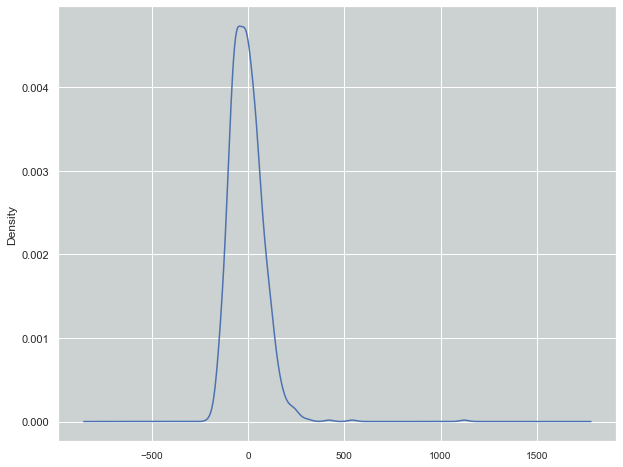

In [170]:
lasso_ypred=lasso_reg.predict(xtest)
lasso_error=ytest-lasso_ypred
lasso_error.plot(kind='kde')

In [171]:
tsc1=lasso_reg.score(xtrain,ytrain)

In [172]:
sc1=lasso_reg.score(xtest,ytest)

# XGB Regressor

In [173]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [174]:
xgb.fit(xtrain,ytrain)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:ylabel='Density'>

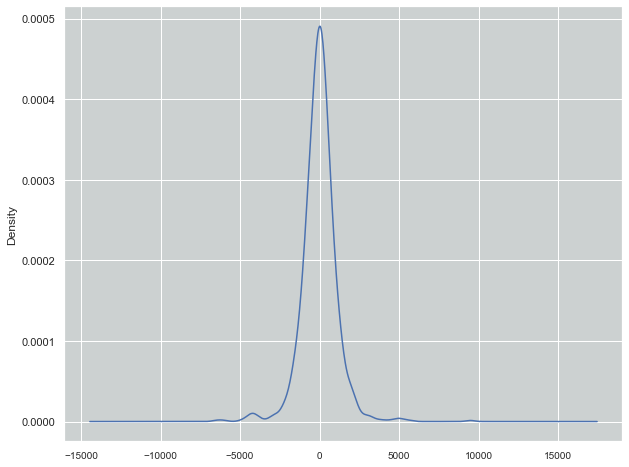

In [175]:
xgb_ypred=xgb.predict(xtest)
xgb_error=ytest-xgb_ypred
xgb_error.plot(kind='kde')


In [176]:
tsc2=xgb.score(xtrain,ytrain)

In [177]:
sc2=xgb.score(xtest,ytest)

# model Evaluation

In [178]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [179]:
def metrics(ytest,ypredict):
    mae=mean_absolute_error(ytest,ypredict) #mean_absolute_error
    mse=mean_squared_error(ytest,ypredict) #mean_squared_error
    rmse=mean_squared_error(ytest,ypredict,squared=False)
    return [mae,mse,rmse]

In [180]:
linearregression = metrics(ytest,y_pred)
linearregression.append(tsc)
linearregression.append(sc)
linearregression 

[0.0036099174011412155,
 2.5669152574483573e-05,
 0.005066473386339217,
 0.9999999999999554,
 0.9999999999999991]

In [181]:
lasso_reg = metrics(ytest,lasso_ypred)
lasso_reg.append(tsc1)
lasso_reg.append(sc1)
lasso_reg 

[66.06580054052311,
 7938.5531045122225,
 89.09855837505017,
 0.9999996288159565,
 0.9999997410655526]

In [182]:
xgb = metrics(ytest,xgb_ypred)
xgb.append(tsc2)
xgb.append(sc2)
xgb 

[751.5272107865685,
 1260904.2138898722,
 1122.8999126769368,
 0.9999928352319288,
 0.9999588726646265]

In [183]:
algos=['linearregression','lasso_reg','xgb']
pd.DataFrame([linearregression,lasso_reg,xgb],
             columns=['Mean Squared Error','Mean Absolute Error','Root Mean SquareError','testscore',
                      'trainscore'],index=algos)

,Mean Squared Error,Mean Absolute Error,Root Mean SquareError,testscore,trainscore
linearregression,0.003610,2.566915e-05,0.005066,1.000000,1.000000
lasso_reg,66.065801,7.938553e+03,89.098558,1.000000,1.000000
xgb,751.527211,1.260904e+06,1122.899913,0.999993,0.999959


# Implementing Hyperparameter tuning with Randomforest

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
ranfor=RandomForestRegressor()

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import scorer


In [187]:
# Creating paramets for Randomized search Cv 

n_est=[int(x) for x in np.linspace(start=100 , stop=1200 , num= 12) ]
max_features=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5 , stop=25, num=5 )]
min_samples_split=[10,25,50,75,100]
min_samples_leaf=[1,2,5,10]




In [188]:
random_grid={'n_estimators':n_est,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}


In [189]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [10, 25, 50, 75, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [190]:
ranfor_random=RandomizedSearchCV(estimator=ranfor,
    param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=5,cv=5,
    verbose=2,random_state=42,n_jobs=2)

In [191]:
ranfor_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [10, 25, 50, 75,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [192]:
ranfor_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 25,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [193]:
ranfor_random.best_score_

-2989598.596935963

<AxesSubplot:xlabel='sale_price', ylabel='Density'>

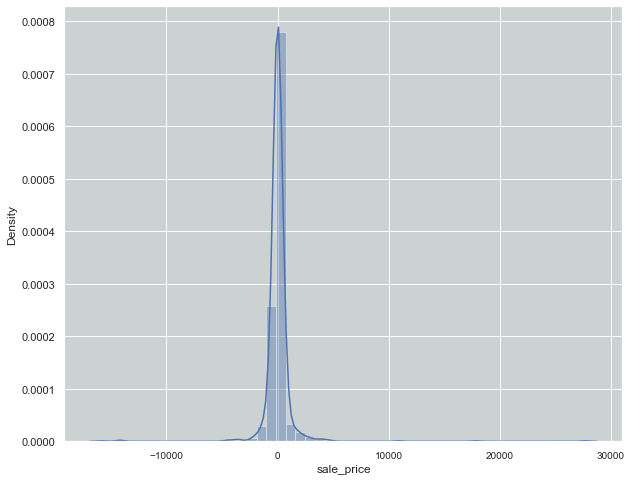

In [194]:
rfpred=ranfor_random.predict(xtest)
error=ytest-rfpred
sns.distplot(error)



<AxesSubplot:xlabel='sale_price'>

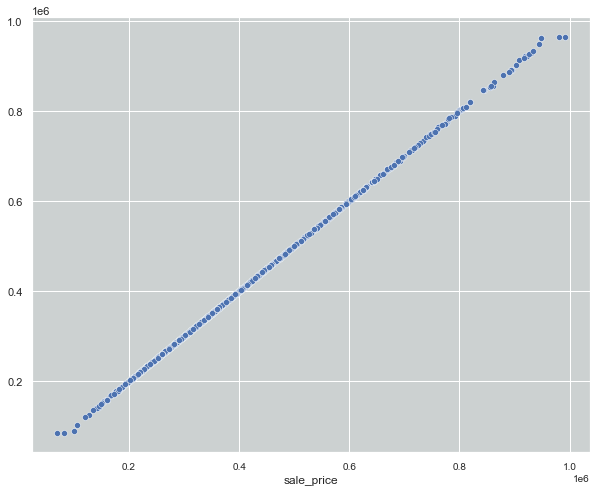

In [195]:
sns.scatterplot(ytest,rfpred)

In [196]:
metrics(ytest,rfpred)

[452.46869334070533, 2178048.5969619234, 1475.8213296201961]

#import pickle
#file = open('random_forest_regression_model.pkl', 'wb')
#pickle.dump(ranfor_random, file)

In [197]:
#file=open('Ran')